<font size="6"><b>[ML for NLP] Lecture 1D: Recap of Probability Theory</b></font>

This notebook consists of a brief introduction to the key concepts of probability theory. Here are the main parts that we'll cover in this notebook:

1. [Introduction to Probability Theory](#Introduction-to-Probability-Theory)
    1. Sample space, Events, Axioms, Conditionals, Independence

2. [Exploring Probability Theory using Real Data](#Exploring-probability-theory-using-real-data)
3. [Random Variables](#Random-Variables)
	1. Discrete RVs, Continuous RVs, Two RVs, Independence
4. [Summary Statistics](#Summary-Statistics)
	1. Quantiles, Expected value, Variance, Mode
5. [Bayes Rule](#Bayes'-Rule)
6. [Important Discrete RVs](#Important-Discrete-Random-Variables)
7. [Important Continuous RVs](#Important-Continuous-Random-Variables)
8. [Joint Distributions for multiple RVs](#Joint-distributions-for-multiple-RVs)
	1. Covariance, Correlation
9. [Multivariate Normal Distribution](#The-multivariate-Gaussian-(normal)-distribution)
10. [Information Theory](#Information-Theory)
	1. Entropy, Cross-entropy, Perplexity, KL-divergence, Mutual Information


---

> Acknowledgments: This lecture is highly based on:
> - Introduction to Probability (2008) by Dimitri Bertsekas and John Tsitsiklis
> - Probabilistic Machine Learning: An Introduction (2021) by Kevin Murphy
> - Lecture slides of the last LxMLS (http://lxmls.it.pt/), which were kindly provided by André Martins and Mário Figueiredo

> _Disclaimer:_ <br>
> Overall, data visualization is a must have tool in the arsenal of any data scientist. Througout this notebook, we will use both `matplotlib` and `seaborn` ([see docs](http://seaborn.pydata.org/)) to plot our data. Seaborn has the advantage of being specific tailored for data science. Moreover, it is actually built on top of matplotlib, so everything we learned so far is still applicable, even though the API changes a little. I strongly recommend you to learn both libs :-). 

$\newcommand{\Prob}{\mathbb{P}}$
$\newcommand{\Expec}{\mathbb{E}}$
$\newcommand{\Var}{\mathbb{V}}$

### Base MathJax
$\newcommand{\bm}[1]{{\boldsymbol{{#1}}}}$
$\DeclareMathOperator{\argmin}{argmin}$
$\DeclareMathOperator{\argmax}{argmax}$

### imports

In [1]:
# imports
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

# define options for seaborn
custom_params = {"axes.spines.right": False, 
                 "axes.spines.top": False, 
                 "grid.color": ".85", 
                 "grid.linestyle": ":"}
sns.set_theme(style="whitegrid", rc=custom_params)

### css

In [2]:
%%html
<style>
.text-center{
    text-align: center;
}
.emphasis{
    font-size: 110%;
}
.visible{
    opacity: 1 !important;
}
.imgs{
    margin: 0px 10px;
}
.blue-box{
    text-align: left;
    color: black;
    padding: 10px 25px;
    background-color: #dbe7ff;
    border: 1px dashed #999;
    margin: 10px 0px;
    display: inline-block;
    clear: both;
    opacity: 0.2;
}
.red-box{
    text-align: left;
    color: black;
    padding: 10px 25px;
    background-color: #e6d5d5;
    border: 1px dashed #999;
    margin: 10px 0px;
    display: inline-block;
    clear: both;
    opacity: 0.2;
}
.green-box{
    text-align: left;
    color: black;
    padding: 10px 25px;
    background-color: #d5e6d8;
    border: 1px dashed #999;
    margin: 10px 0px;
    display: inline-block;
    clear: both;
    opacity: 0.2;
}
.transparent-box{
    text-align: left;
    color: black;
    padding: 10px 25px;
    margin: 10px 0px;
    display: inline-block;
}
.blue-box:hover{
    opacity: 1.0;
}
.red-box:hover{
    opacity: 1.0;
}
.green-box:hover{
    opacity: 1.0;
}
.float-right{
    float: right;
}
.float-left{
    float: left;
}
.margin-left-20{
    margin-left: 20px;
}
.margin-left-50{
    margin-left: 50px;
}
.margin-left-100{
    margin-left: 100px;
}
.clear{
    clear: both;
}
.ex-table{
  border: 1px solid black;
  border-collapse: collapse;
}
.ex-table th{
    border: 1px solid black;
    border-collapse: collapse;
}
.ex-table td{
    border: 1px solid black;
    border-collapse: collapse;
}

</style>

### plot utils

<AxesSubplot:ylabel='Proportion'>

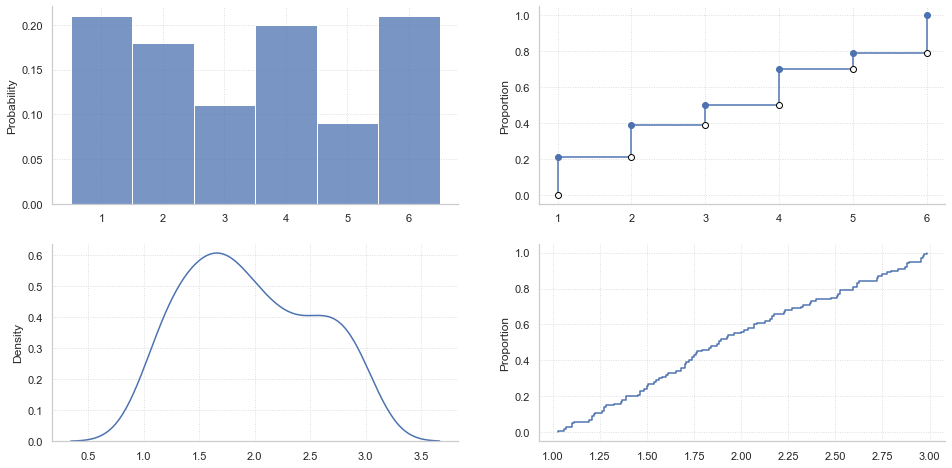

In [3]:
from collections import Counter

def stylize_plot(ax, xlim=None, ylim=None, xticks=None, yticks=None):
    # plot grid with 0.9 opacity on all x and y ticks
    ax.grid(lw=0.9, linestyle=":", which='major')
    # limit view from min(x) to max(x) on x-axis (similarly for y)
    if xlim is not None:
        ax.set_xlim(*xlim)
    if ylim is not None:
        ax.set_ylim(*ylim)
    # add specific x, y ticks (makes sense for a discrete distribution)
    if xticks is not None:
        ax.set_xticks(xticks)
    if yticks is not None:
        ax.set_yticks(yticks)
    # remove top and right spines
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    return ax


def get_probabilities_from_data(data, sort=True):
    # compute unique data values and their probabilities (frequency / total)
    # c will be a dict where keys are data entries and valeus are their frequency
    c = Counter(data)
    x = list(sorted(c.keys())) if sort else list(c.keys())
    y = list(map(c.__getitem__, x))
    p = np.array(y) / sum(y)
    return x, p


def plot_pmf_fn(
    x, 
    pmf_fn, 
    ax=None, 
    xticks=None, 
    yticks=None, 
    xlim=None, 
    ylim=None, 
    **kwargs
):
    if ax is None:
        fig, ax = plt.subplots(1,1) 
    ax.bar(x, pmf_fn(x), **kwargs)
    stylize_plot(ax, xlim=xlim, ylim=ylim, xticks=xticks, yticks=yticks)
    return ax

def plot_pdf_fn(
    x, 
    pdf_fn, 
    ax=None, 
    xticks=None, 
    yticks=None, 
    xlim=None, 
    ylim=None, 
    **kwargs
):
    if ax is None:
        fig, ax = plt.subplots(1,1) 
    ax.plot(x, pdf_fn(x), '-', **kwargs)
    stylize_plot(ax, xlim=xlim, ylim=ylim, xticks=xticks, yticks=yticks)
    return ax

def plot_cdf_fn(
    x, 
    cdf_fn, 
    discrete=False, 
    bullets=False, 
    ax=None, 
    xticks=None, 
    yticks=None, 
    xlim=None, 
    ylim=None, 
    **kwargs
):
    if ax is None:
        fig, ax = plt.subplots(1,1) 
    if discrete:
        ax.vlines(x, [0]+cdf_fn(x[:-1]).tolist(), cdf_fn(x))
        ax.hlines(cdf_fn(x[:-1]), x[1:], x[:-1])
        if bullets:
            ax.plot(x, cdf_fn(x), 'o', **kwargs)
            ax.plot(x, [0]+cdf_fn(x[:-1]).tolist(), 'wo', markeredgecolor='k')
    else:
        ax.plot(x, cdf_fn(x), '-', **kwargs)
    stylize_plot(ax, xlim=xlim, ylim=ylim, xticks=xticks, yticks=yticks)
    return ax


def plot_pmf(
    data, 
    ax=None, 
    kind='mpl_stem', 
    xticks=None, 
    yticks=None, 
    xlim=None, 
    ylim=None, 
    **kwargs
):
    if ax is None:
        fig, ax = plt.subplots(1,1) 
    if kind == 'mpl_stem' or kind == 'mpl_hist':
        # get unique data values as x and their probabilities as p 
        x, p = get_probabilities_from_data(data)
        if kind == 'mpl_stem':
            # plot pmf as vertical lines
            ax.stem(x, p, linefmt='k:', markerfmt='ko', basefmt='k-', **kwargs)
        else:
            # plot pmf as a histogram
            ax.bar(x, p, align='center', **kwargs)
    else:
        # plot using seaborn
        ax = sns.histplot(data, ax=ax, discrete=True, stat='probability', **kwargs)
    # do some stylizing
    stylize_plot(ax, xlim=xlim, ylim=ylim, xticks=xticks, yticks=yticks)
    return ax
    

def plot_cdf(
    data, 
    ax=None, 
    kind='mpl', 
    xticks=None, 
    yticks=None, 
    xlim=None, 
    ylim=None, 
    bullets=False,
    **kwargs
):
    def draw_bullets(X, Y):
        # draw open and closed bullets to represent open/closed sets
        ax.plot(X, Y, 'bo')
        ax.plot(X, [0]+list(Y[:-1]), 'wo', markeredgecolor='black')
        
    if ax is None:
        fig, ax = plt.subplots(1,1)
    if kind == 'mpl':
        # get unique data values as x and their probabilities (frequency / total) as p
        x, p = get_probabilities_from_data(data)
        # plot escalator
        X_ = [x[0] - 1] + x + [x[-1] + 1]
        pts = list(zip(X_[:-1], X_[1:]))
        F = [0] + np.cumsum(p).tolist() + [1]
        for i, pt in enumerate(pts):
            ax.plot(pt, [F[i], F[i]], 'b-')
            ax.plot([pt[1], pt[1]], [F[i] or 0, F[i+1] or 1], 'b-')
        if bullets:
            draw_bullets(X_, F)
    else:
        # plot using seaborn
        ax = sns.ecdfplot(data, ax=ax, **kwargs)
        ax.set_ylim(-0.05, 1.05)
        if bullets:
            x, p = get_probabilities_from_data(data, sort=not isinstance(data[0], str))
            draw_bullets(x, np.cumsum(p))
    # do some stylizing
    stylize_plot(ax, xlim=xlim, ylim=ylim, xticks=xticks, yticks=yticks)
    return ax


def plot_pdf(
    data, 
    ax=None, 
    kind='mpl', 
    xticks=None, 
    yticks=None, 
    xlim=None, 
    ylim=None, 
    **kwargs
):
    if ax is None:
        fig, ax = plt.subplots(1,1)
    if kind == 'mpl':
        # we will have to estimate the density from the data
        # so we will use scipy's gaussian_kde
        from scipy.stats.kde import gaussian_kde
        # get density
        kde = gaussian_kde(data)
        # these are the values over wich your kernel will be evaluated
        x = np.linspace(min(data), max(data), 100)
        # plot the results
        ax.plot(x, kde(x), **kwargs)
    elif kind == 'sns':
        # plot using seaborn
        ax = sns.kdeplot(data, ax=ax, **kwargs)
    # do some stylizing
    stylize_plot(ax, xlim=xlim, ylim=ylim, xticks=xticks, yticks=yticks)
    return ax
    

data_d = np.random.randint(1, 7, size=(100,))
data_c = np.random.rand(100)*2 + 1

fig, axs = plt.subplots(2, 2, figsize=(16, 8))
plot_pmf(data_d, ax=axs[0,0], kind='sns')
plot_cdf(data_d, ax=axs[0,1], kind='sns', bullets=True)
plot_pdf(data_c, ax=axs[1,0], kind='sns')
plot_cdf(data_c, ax=axs[1,1], kind='sns', bullets=False)

---

# Introduction to Probability Theory

> Probability theory is nothing but common sense reduced to calculation. — Pierre Laplace, 1812
<!-- Essentially, all models are wrong, but some are useful. — George Box Box, 1987 -->
<!-- <img src="./probability_learning.png" width="30%" /> -->



## What is probability? 

### Classical definition:
$$\Prob(A) = \frac{N_A}{N}$$ 

where  $N_A$ is the number of occurrences of event $A$, and $N$ is the number of mutually exclusive equally likely outcomes. For example:

$$\Prob(\mbox{randomly drawn card is}\; \clubsuit) = \frac{13}{52} = \frac{13 \text{ cards of } \clubsuit}{\text{total number of cards}}$$

$$\Prob(\mbox{getting heads in a coin toss}) = \frac{1}{2}$$

Image we flip a fair coin. In the classical definition, the probability of gettings heads is the one chance over the total number of possibilities (heads or tails), therefore it is 50%. 


### Frequentist definition:

$$
\Prob(A) = \lim_{N \to \infty} \frac{N_A}{N}
$$

where probabilities represent long run frequencies of events that can happen multiple times. For the coin toss example, the above statement means that if we flip the coin multiple times, we expect it to see heads about 50% of the time.


### Bayesian definition:

$$
\Prob(A) = \text{degree of belief.}
$$

where probability is used to quantify our uncertainty about something. In the coin toss example, this means that we believe the coin is equally likely to land heads or tails on the next toss.

<img src="https://images.immediate.co.uk/production/volatile/sites/4/2018/08/iStock_000007316033_XXXLarge-af0389d.jpg?webp=true&quality=90&resize=940%2C399" width="60%" />
<center>
<small>
Actually, the Stanford statistician  Persi Diaconis has shown that a coin is about 51%<br> likely to land facing the same way up as it started, due to the physics of the problem.
</small>
</center>


We shall therefore adopt the **Bayesian interpretation** in this course. One big advantage of the Bayesian interpretation is that it can be used to model our uncertainty about events that are hard to get data from. For example:

$$
\Prob(\text{polar ice cap will melt by 2030})
$$

Fortunately, the basic rules of probability theory are the same, no matter which interpretation is adopted.


## Sample space and Events

The **sample space** $\mathcal{X}$ is the set of possible outcomes of a random experiment. For example:

- Tossing two coins: $\mathcal{X} = \{HH, HT, TH, TT\}$
- Roll a D-sided die: $\mathcal{X} = \{1, 2, ..., D\}$
- Draw a card from a shuffled deck: $\{A\clubsuit, 2\clubsuit,...,Q\diamondsuit,K\diamondsuit\}$
- _Time until you receive the next email:_ $\mathcal{X} = \mathbb{R}_+$
- _2d location of the next rain drop:_ $\mathcal{X} = \mathbb{R}^2$

An **event** $A$ is a subset of $\mathcal{X}: A \subseteq \mathcal{X}$. For example:

- Exactly one H in 2-coin toss: $A = \{TH, HT\} \subset \{HH,TH,HT,TT\} $
- Odd number in D-sided die roll: $\mathcal{X} = \{1, 3, ...,\} \subset \{1, 2, ..., D\}$
- Drawn a $\heartsuit$ card:  $C = \{A\heartsuit,2\heartsuit,...,K\heartsuit\} \subset \{A\clubsuit, 2\clubsuit,...,Q\diamondsuit,K\diamondsuit\}$
- Number of emails in less then 2min
- Frequency of rain drops in a specific 2d location


## Probability Axioms

The probability of an event is denoted as $\Prob(A)$, and it can be seen as a function that maps an event $A$ into the interval $[0, 1]$. Moreover, it should satisfy the following axioms:

<center>
<div class="blue-box visible">
$$
\begin{align}
\textbf{(Non Negativity)} &\quad \Prob(A) \geq 0 \text{ for any event } A \\
\\
\textbf{(Normalization)} &\quad \Prob(\mathcal{X}) = 1 \\
\\
\textbf{(Additivity)} &\quad \text{ If } A_1,\, A_2\, ... \subseteq \mathcal{X} \text{ are disjoint events, then } \mathbb{P}\Bigl( \bigcup_{i} A_i \Bigr) = \sum_i \mathbb{P}(A_i)
\end{align}
$$
</div>



<span class="float-left">$\qquad\qquad\qquad\qquad$</span>

<div class="transparent-box float-left">
From these axioms, many results can be derived:
<br><br>
$
\begin{align}
&\Prob(\emptyset) = 0 \\ \\
&\Prob(A \cup B) = \Prob(A) + \Prob(B) - \Prob(A \cap B) \\
&\Prob(A \cup B) \leq \Prob(A) + \Prob(B) \\ \\
&C \subset D \implies \Prob(C) < \Prob(D) \\
\end{align}
$
</div>
    
<span class="float-left">$\qquad$</span>

<img src="../figs/conditional.png" width="20%" class="float-left margin-left-100" />
    
</center>

    



## Conditional Probability

The conditional probability of event $B$ happening given that $A$ has occurred is defined as:

<center>
<div class="blue-box visible">
$$
\textbf{(Conditional prob. of B given A)} 
\qquad \Prob(B \mid A) = \frac{\Prob(A \cap B)}{\Prob(A)}
$$
</div>
</center>

Assuming that $\Prob(A) > 0$ since we can't condition on an impossible event. 

This raises the equation for the probability of two events occurring simultaneously:
<center>
<div class="blue-box visible">
$$
\begin{align}
\textbf{(Probability of A and B)} 
\qquad \Prob(A \cap B) &= \Prob(B \mid A)\Prob(A) \\
       \Prob(A \cap B) &= \Prob(A \mid B)\Prob(B)
\end{align}
$$
</div>
</center>

Importantly, conditional probabilities satisfy all three probability axioms. That is, suppose we fix $A$, then:


- For any $B \subseteq \mathcal{X}$, $\Prob(B \mid A) \geq 0$

- $\Prob(\mathcal{X} \mid A) = 1$

- If $B_1, B_2, ... \subseteq \mathcal{X}$ are disjoint, then $\Prob\Big( \bigcup_{i} B_i \,\Big|\, A \Big) = \sum_i \Prob(B_i|A)$


## Independence

We say that events $A$ and $B$ are independent if

<center>
<div class="blue-box visible">  
$$
\textbf{(Independence of A and B)} 
\qquad (A \,\bot\, B)  \; \Leftrightarrow\; \Prob(A \cap B) = \Prob(A) \Prob(B)
$$
</div>
</center>

This means that:
$$
(A \,\bot\, B)  \; \Leftrightarrow\; \Prob(A \mid B) = \frac{\Prob(A \cap B)}{\Prob(B)} = \frac{\Prob(A) \Prob(B)}{\Prob(B)} = \Prob(A)
$$

For example, let:
- $\mathcal{X}=\mbox{``52 cards"}$
- $A = \{3\heartsuit,3\clubsuit,3\diamondsuit,3\spadesuit\}$
- $B = \{A\heartsuit, 2\heartsuit,...,K\heartsuit\}$ 

Then: 
- $\Prob(A) = 4/52 = 1/13$
- $\Prob(B) = 13/52 = 1/4$

So, we get:
$$
\begin{align}
\Prob(A\cap B) &= \Prob(\{3\heartsuit\}) = \frac{1}{52} \\
\Prob(A)\, \Prob(B) &= \frac{1}{13} \, \frac{1}{4}  = \frac{1}{52} \\
\Prob(A \mid B) &= \Prob(``3'' \mid ``\heartsuit'') = \frac{1}{13} = \Prob(A)
\end{align}
$$

Therefore, $A \,\bot\, B$.

We can extend the concept of independence to more than two events as follows:

<center>
<div class="blue-box visible">  
$$
\textbf{(Conditional independence)} 
\qquad (A \,\bot\, B \mid C)  \; \Leftrightarrow\; \Prob(A, B \mid C) = \Prob(A \mid C) \Prob(B \mid C) 
$$
</div>
</center>

Note that
$$
\qquad (A \,\bot\, B \mid C)  \; \Leftrightarrow\; \Prob(A, B \mid C) = \frac{\Prob(A, B, C)}{\Prob(C)} = \frac{\Prob(A)\Prob(B)\Prob(C)}{\Prob(C)} = \Prob(A)\Prob(B)
$$

## Law of total probability 


We can derive Bayes Theorem from the law of total probability, which is defined as follows.

<center>


<div class="transparent-box float-left">
<br><br>
If $A_1, ..., A_n$ are a partition of $\mathcal{X}$, then:
<br><br>
$$
\begin{align}
\Prob(B) &= \sum_i \Prob(B \cap A_i) \\
         &= \sum_i \Prob(B \mid A_i) \Prob(A_i)
\end{align}
$$
</div>

<span class="float-left">$\qquad$</span>
    
<img src="../figs/total_prob.png" width="20%" class="float-left margin-left-100" />

</center>

<div class="clear"></div>

### Bayes theorem 

If $A_1, ..., A_n$ are a partition of $\mathcal{X}$:

$
\mathbb{P}(A_i | B) = \dfrac{\mathbb{P}(B \cap A_i) }{\mathbb{P}(B)} 
                    = \dfrac{\mathbb{P}(B | A_i) \; \mathbb{P}(A_i)}{\sum_{j} \mathbb{P}(B|A_j) \mathbb{P}(A_j)} 
                    = \dfrac{\mathbb{P}(B | A_i) \; \mathbb{P}(A_i)}{\mathbb{P}(B)} 
$

We will see more about Bayes theorem (or Bayes rule) later with some concrete examples.

<br>
<center>
    <b>Exercise:</b>
    <br>
    Given that $\mathcal{X}=\mbox{``52 cards"}$, $A_\heartsuit = \{1\heartsuit, ..., K\heartsuit\}$, ..., $A_\spadesuit = \{1\spadesuit, ..., K\spadesuit\}$, and
$B = \{4\heartsuit,3\clubsuit,2\diamondsuit,1\spadesuit\}$
    <br><br>
    (1) Use the law of total probability to compute $\Prob(B)$ 
    <br>
    (2) Check your result with the Python snippet below.
    <br>
    (3) Are $A$ and $B$ independent? Why?
</center>

In [4]:
suits = ['h', 'c', 'd', 's']
X = [str(i)+s for s in suits for i in range(1, 14)]
A_h, A_c, A_d, A_s = X[:13], X[13:26], X[26:39], X[39:52]
A = [A_h, A_c, A_d, A_s]
B = ['4h', '3c', '2d', '1s']

def total_prob_law(event, partitions, X):
    prob = 0
    event = set(event)
    sample_space = set(X)
    for partition in partitions:
        A_i = set(partition)
        assert A_i.issubset(sample_space)
        p_B_given_A = len(A_i & event) / len(A_i)
        p_A = len(A_i) / len(sample_space)
        prob += p_B_given_A * p_A
    return prob

print('Prob of B using sets:', len(set(B)) / len(set(X)))
print('Prob of B using total prob. law:', total_prob_law(B, A, X))

Prob of B using sets: 0.07692307692307693
Prob of B using total prob. law: 0.07692307692307693


---

# Exploring probability theory using real data

Most examples in textbooks use coins, dice, cards, roulettes, etc. to demonstrate the applicability of probability theory ideas. This is fine to explain simple concepts such as the probability axioms and their direct results that we saw above. However, for the rest of this lecture we will take a more pragmatic approach and use an actual dataset to exemplify probability concepts. So, without further redue, let's see our dataset.

### Titanic dataset

The sinking of the Titanic is one of the most (in)famous accidents in history.

<img src="https://ichef.bbci.co.uk/news/640/cpsprodpb/15A5F/production/_115017688_c6122844-332e-4516-a812-e56991e9374a.jpg" width="40%" class="float-left" />

In [5]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


We don't need to look at ALL columns, so we will do some simple data cleaning: 
- remove rows with NaNs
- merge the `sibsp` and `parch` columns in a single column
- convert `class` to int
- convert `who` to a binary column informing whether the passenger is an adult or not

In [6]:
# select columns
df = df[['survived', 'sex', 'age', 'sibsp', 'parch', 'fare',  'class', 'who', 'embark_town']]

# drop entries (rows) with NaNs
df = df.dropna()

# reset index (so we get increments of +1)
df = df.reset_index(drop=True)

# merge sibsp and parch columns
df['relatives'] = df['sibsp'] + df['parch']

# convert First, Second, Third class to 1, 2, 3, respectively
df['class'] = df['class'].map({'First': 1, 'Second': 2, 'Third': 3}).astype(int)

# convert `who` to `adult` or `child`
df['adult'] = df['who'].isin(['man', 'woman']).astype(int)

# drop unnecessary columns
df = df.drop(columns=['sibsp', 'parch', 'who'])
df

,survived,sex,age,fare,class,embark_town,relatives,adult
0,0,male,22.0,7.2500,3,Southampton,1,1
1,1,female,38.0,71.2833,1,Cherbourg,1,1
2,1,female,26.0,7.9250,3,Southampton,0,1
3,1,female,35.0,53.1000,1,Southampton,1,1
4,0,male,35.0,8.0500,3,Southampton,0,1
...,...,...,...,...,...,...,...,...
707,0,female,39.0,29.1250,3,Queenstown,5,1
708,0,male,27.0,13.0000,2,Southampton,0,1
709,1,female,19.0,30.0000,1,Southampton,0,1
710,1,male,26.0,30.0000,1,Cherbourg,0,1


We ended up with 8 variables:

- **survived:** 1 if the person survided, 0 otherwise 🙁
- **sex:** male or female
- **age:** age in fraction, with `0.` for newborns babies, and `.5` for estimates
- **fare:** passenger fare
- **class:** a proxy for socio-economic status (1st = upper, 2nd = middle, 3rd = lower)
- **embark_town:** the town where the person embarked in the titanic
- **relatives:** the total number of sibligns, spouses, childs, or parents aboard
- **adult:** whether the passenger is an adult or a child

With that in mind, let's start looking at Random Variables!

---

# Random Variables

A **random variable (RV)**  $X$ represents an unknown quantity of interest. For example, it could represent a dice roll or the temperature at the current time. 

Mathematically, a RV is a (real-valued) function $X$ that maps events from a sample space $\mathcal{X}$ to outcomes in a measurable space (e.g., reals): $X: \mathcal{X} \to \mathbb{R}$. 

<img src="../figs/rv.png" width="40%" />

Informally, as "measurable space" we mean that our random variables are nothing but "columns" in our dataset that we can "measure" them somehow as to induce a probability distribution. For example:

- The `embark_town` column is a (discrete) rv that maps from the sample space (the space of all possible strings) to the actual registered strings (e.g., Southampton)
- The `fare` column is a (continuous) rv that maps from the sample space ($\mathbb{R}$) to the actual registered numbers (e.g., 7.25\$)

## Discrete RVs

If the range of $X$ is finite or countably finite, then $X$ is called a **discrete random variable**. In this case, we want to map a finite/countable subset of the input space to the real line.

The **probability mass function** or **pmf** of $X$, denoted as $p_X$, is a function which computes the probability of an event, which corresponds to setting the rv to a possible value:

<center>
<div class="blue-box visible">
$$
\textbf{(probability mass function)} \qquad p_X(x) = \Prob(X = x)
$$
</div>
</center>

Note that the _pmf satisfies all probability axioms_. Therefore, it can be interpreted as an actual probability.

For example, the pmf for `X = embark_town` being `Southampton` is:

$$
p_{\text{embark_town}}(\text{southampton}) = \Prob(\text{embark_town} = \text{southampton}) = \dfrac{\# \text{southampton}}{\text{total number of embark towns}}
$$

In code:

In [7]:
pmf_embark_town = df['embark_town'].value_counts() / df['embark_town'].count()
pmf_embark_town

Southampton    0.778090
Cherbourg      0.182584
Queenstown     0.039326
Name: embark_town, dtype: float64

<AxesSubplot:xlabel='embark_town', ylabel='Probability'>

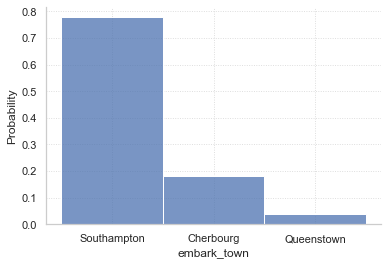

In [8]:
plot_pmf(df['embark_town'], kind='sns')

## Continuous RVs

If $X \in \mathbb{R}$ is a real-valued quantity, it is called a **continuous random variable**. In this case, we are mapping a portion (or intervals) of the input space to the real line.

<img src="../figs/rv_cdf.png" width="45%" />


### Probability density function (pdf)

For a subset $B$ of the real line, the **probability density function** or **pdf** of $X$, denoted as $f_X$, is defined as:

<center>
<div class="blue-box visible">
$$
\textbf{(probability density function)} \qquad \int_B f_X(x) dx = \Prob(X \in B)
$$
</div>
</center>

In particular, the probability that the value of $X$ falls within an interval is:

$$
\Prob(a \leq X \leq b) = \int_a^b f_X(x) dx
$$

As the size of the interval gets smaller, we can write the probability of $x$ as:

$$
\Prob(x \leq X \leq x+dx) \approx f_X(x)dx
$$

Note that to qualify as a pdf, a function $f_X$ must satisfy the probability axioms.

For example, the pdf for `X = age` being more or less equal to `25` is:

$$
f_{\text{age}}(25) = \Prob(25 \leq \text{age} \leq 25 + \epsilon) = \text{area under the age density around 25}
$$

In practial terms, we can estimate this **density** using a histogram plot, where we compute the number of instances that are inside fixed-bin intervals, and them we plot a curve that "fits" the histogram. This process is known as **kernel density estimation** or **kde** for short. Let's see this in practice:

<AxesSubplot:xlabel='age', ylabel='Probability'>

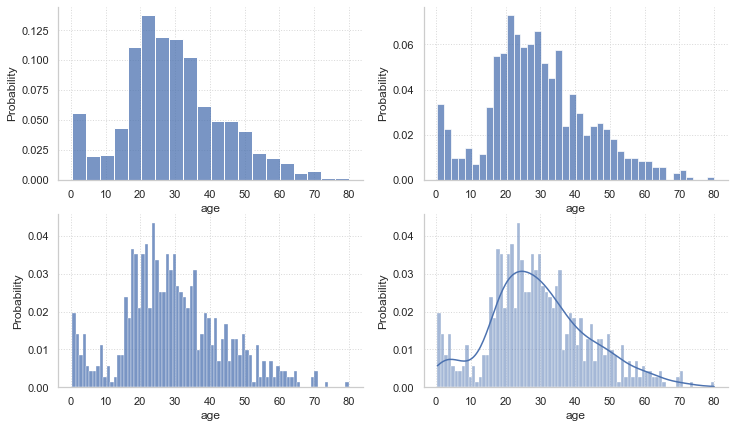

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(12, 7))
sns.histplot(df['age'], ax=axs[0, 0], discrete=False, stat='probability', bins=20)
sns.histplot(df['age'], ax=axs[0, 1], discrete=False, stat='probability', bins=40)
sns.histplot(df['age'], ax=axs[1, 0], discrete=False, stat='probability', bins=80)
sns.histplot(df['age'], ax=axs[1, 1], discrete=False, stat='probability', bins=80, kde=True)

In [10]:
# we will use scipy's gaussian_kde to compute our density
from scipy.stats.kde import gaussian_kde
density = gaussian_kde(df['age'])
print('P(age is about 25) = {:.3f}'.format(density(25)[0]))

P(age is about 25) = 0.031


## Cumulative distribution function (cdf)


In general, we define the **cumulative distribution function** or **cdf** of the rv $X$ as follows:

<center>
<div class="blue-box visible">
$$
\textbf{(discrete CDF)} \qquad F_X(x) = \Prob(X \leq x) = \sum_{k \leq x} p_X(k)
$$
</div>
<br>
<div class="blue-box visible">
$$
\textbf{(continuous CDF)} \qquad F_X(x) = \Prob(X \leq x) = \int_{-\infty}^x f_X(x)dx
$$
</div>
</center>

Cdf’s are monotonically non-decreasing functions. Moreover, using this notion, we can see that:

$$
f_X(x) = \frac{d}{dx} F_X(x),
$$

which is often a very useful fact in practice.

For example, let's compute the CDF for the two previous rvs, `embark_town` and `age`.

<AxesSubplot:title={'center':'cdf'}, xlabel='embark_town', ylabel='Proportion'>

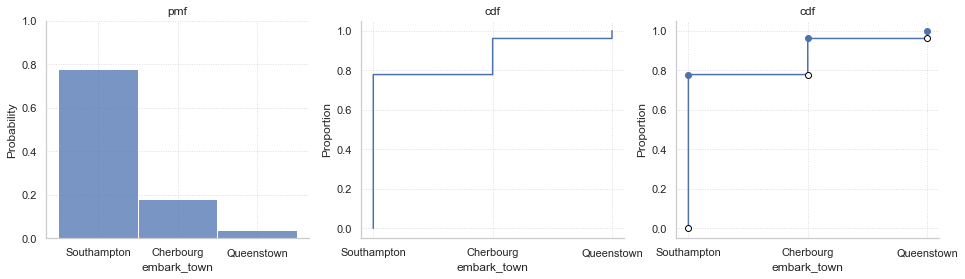

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

axs[0].set_title('pmf')
plot_pmf(df['embark_town'], ax=axs[0], kind='sns', yticks=np.linspace(0, 1, 6))

axs[1].set_title('cdf')
plot_cdf(df['embark_town'], ax=axs[1], kind='sns')

axs[2].set_title('cdf')
plot_cdf(df['embark_town'], ax=axs[2], kind='sns', bullets=True)

<AxesSubplot:title={'center':'cdf'}, xlabel='age', ylabel='Proportion'>

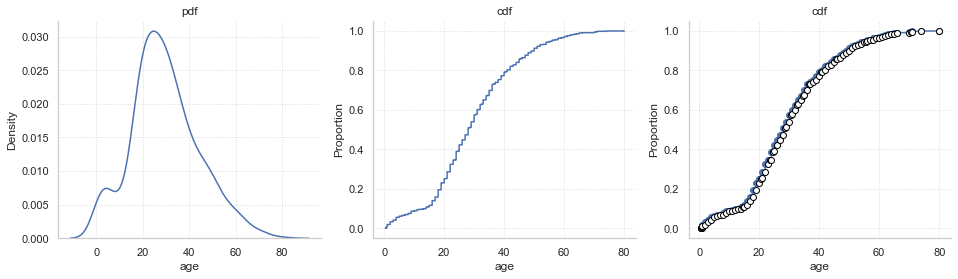

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

axs[0].set_title('pdf')
plot_pdf(df['age'], ax=axs[0], kind='sns')

axs[1].set_title('cdf')
plot_cdf(df['age'], ax=axs[1], kind='sns')

axs[2].set_title('cdf')
plot_cdf(df['age'], ax=axs[2], kind='sns', bullets=True)

Text(32, 0.1, 'Height: 0.53')

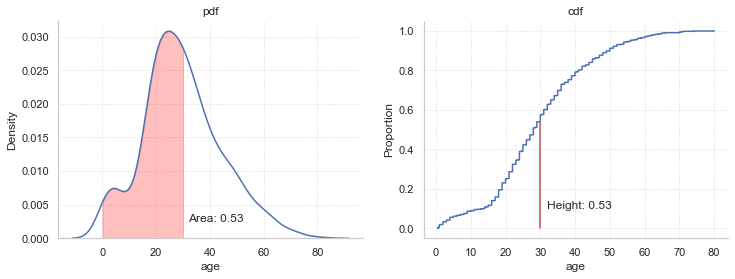

In [13]:
from scipy.stats.kde import gaussian_kde
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].set_title('pdf')
plot_pdf(df['age'], ax=axs[0], kind='sns')

axs[1].set_title('cdf')
plot_cdf(df['age'], ax=axs[1], kind='sns')


# draw subarea in the pdf
pdf_age = gaussian_kde(df['age'])
x = np.linspace(0, 30, 100)
y = pdf_age(x)
area = np.trapz(y, x)
axs[0].fill_between(x, y, color='red', alpha=0.25)
axs[0].annotate('Area: {:.2f}'.format(area), xy=(32, 0.0025), fontsize=12)

# draw vertical jump
axs[1].plot([30, 30], [0, area], 'r-')
axs[1].annotate('Height: {:.2f}'.format(area), xy=(32, 0.1), fontsize=12)

### More (classical) examples

If $X$ is discrete and has $K$ possible values, its pmf can be represented as a list of $K$ numbers, which we can plot as a histogram. 
Similarly, if $X$ is continuous, its pmf can be plotted as a line where the area under the curve sums to 1 (known as density plot). For example, for 

$X$ = output of a fair 6-sided die

<AxesSubplot:title={'center':'cdf of a fair 6-sided die roll'}, ylabel='Proportion'>

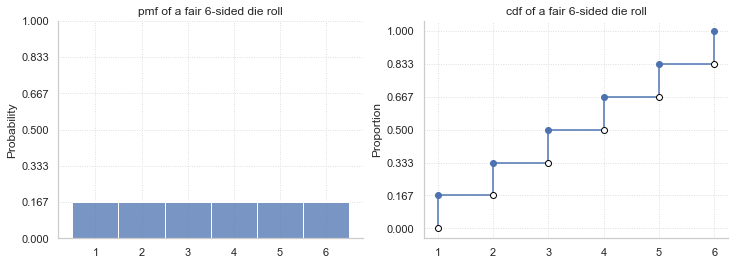

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# die roll example
data_fair_die = list(range(1, 7))

axs[0].set_title('pmf of a fair 6-sided die roll')
plot_pmf(data_fair_die, ax=axs[0], kind='sns', yticks=np.linspace(0, 1, 7), xticks=range(1, 7))

axs[1].set_title('cdf of a fair 6-sided die roll')
plot_cdf(data_fair_die, ax=axs[1], kind='sns', yticks=np.linspace(0, 1, 7), xticks=range(1, 7), bullets=True)

$X$ = number of heads in tossing two coins

<AxesSubplot:title={'center':'cdf of number of heads in tossing two coins'}, ylabel='Proportion'>

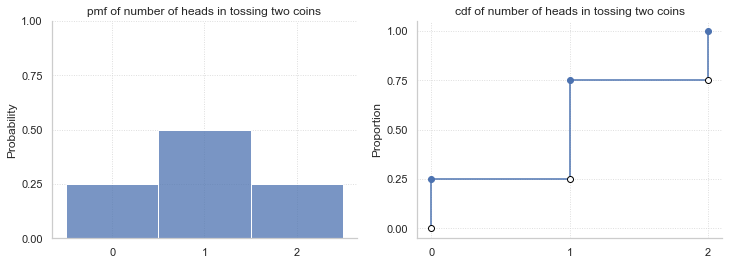

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# number of heads in tossing two coins 
data_two_coins = [s.count('H') for s in ['TT', 'TH', 'HT', 'HH']]

axs[0].set_title('pmf of number of heads in tossing two coins')
plot_pmf(data_two_coins, ax=axs[0], kind='sns', yticks=np.linspace(0, 1, 5), xticks=[0, 1, 2])

axs[1].set_title('cdf of number of heads in tossing two coins')
plot_cdf(data_two_coins, ax=axs[1], kind='sns', yticks=np.linspace(0, 1, 5), xticks=[0, 1, 2], bullets=True)

$X$ = random numbers sampled uniformly between 1 and 3

<AxesSubplot:title={'center':'cdf'}>

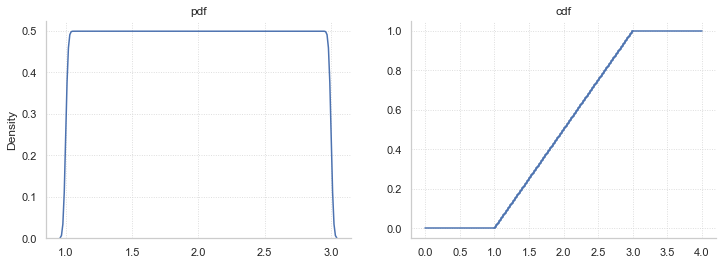

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

data_uniform = np.linspace(1, 3, 1000)

axs[0].set_title('pdf')
plot_pdf(data_uniform, ax=axs[0], kind='sns', bw_adjust=0.1)

axs[1].set_title('cdf')
plot_cdf(data_uniform, ax=axs[1], kind='mpl')

$X$ = random numbers that increase lienarly from $a$ to $b$

<AxesSubplot:title={'center':'cdf'}>

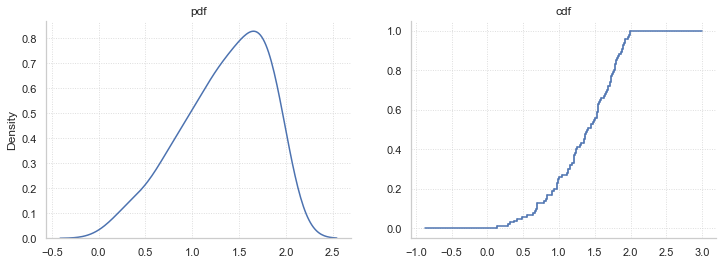

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

a, b = 0, 2
data_triagular = np.random.triangular(a, b, b, size=100)

axs[0].set_title('pdf')
plot_pdf(data_triagular, ax=axs[0], kind='sns')

axs[1].set_title('cdf')
plot_cdf(data_triagular, ax=axs[1], kind='mpl')

### Scipy examples

Sometimes working directly with data is not enough. For example, we might want to use the pdf of a TRUE uniform or triangular distribution, and not something that is only an approximation. In this case, we can use closed-form expressions for the pdf and the cdf. Finding a closed-form expression is mostly a mathematical task and sometimes can be very hard. Fortunetely, we can drink from this knoweledge fountain by using in `scipy.stats`. 

See the complete list of available distributions here: https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats

For example:


<AxesSubplot:>

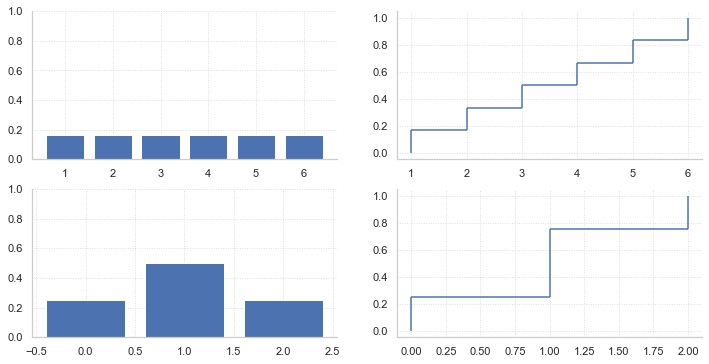

In [18]:
from scipy.stats import randint, binom

fig, axs = plt.subplots(2, 2, figsize=(12, 6))

rv = randint(low=1, high=7)
x = np.arange(1, 7)
plot_pmf_fn(x, rv.pmf, ax=axs[0,0], ylim=(0, 1))
plot_cdf_fn(x, rv.cdf, discrete=True, ax=axs[0,1])

rv = binom(n=2, p=0.5)
x = np.arange(0, 3)
plot_pmf_fn(x, rv.pmf, ax=axs[1,0], ylim=(0, 1))
plot_cdf_fn(x, rv.cdf, discrete=True, ax=axs[1,1])

<AxesSubplot:>

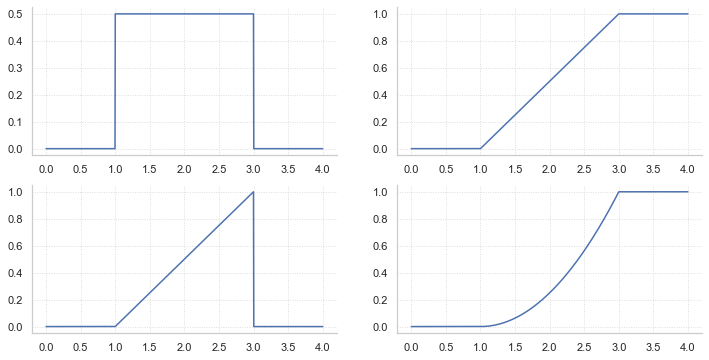

In [19]:
from scipy.stats import uniform, triang

fig, axs = plt.subplots(2, 2, figsize=(12, 6))

rv = uniform(loc=1, scale=2)
x = np.linspace(0, 4, 1000)
plot_pdf_fn(x, rv.pdf, ax=axs[0,0])
plot_cdf_fn(x, rv.cdf, discrete=False, ax=axs[0,1])

rv = triang(c=1, loc=1, scale=2)
x = np.linspace(0, 4, 1000)
plot_pdf_fn(x, rv.pdf, ax=axs[1,0])
plot_cdf_fn(x, rv.cdf, discrete=False, ax=axs[1,1])

---

## Two random variables

### Joint distribution

Let $X$ and $Y$ be two random variables. Their joint distribution of two discrete rvs is denoted as: 

<center>
<div class="blue-box visible">
$$
\textbf{(joint discrete distribution)} \qquad f_{X,Y}(x,y) = \Prob(X=x \,\land\, Y=y)
$$
</div>
</center>

If both variables are discrete, we can represent the joint distribution as a table. For example:

$$
\begin{array}{r|ll}
f_{X,Y}(x,y) & Y=0 & Y=1 \\
\hline
X=0 & 0.2 & 0.1 \\
X=1 & 0.4 & 0.3
\end{array}
$$

Note that $\sum_x\sum_y f_{X,Y}(x,y) = 1$.

For example, for $X=$ sex and $Y=$ embark town, we have:

If the two variables are continuous, the joint distribution is defined as:

<center>
<div class="blue-box visible">
$$
\textbf{(joint continuous distribution)} \qquad f_{X,Y}(x,y) = \Prob((x, y) \in A) = \iint_A f_{X,Y}(x,y) dx dy
$$
</div>
</center>

### Marginal distribution

Given a joint distribution, we define the marginal distribution of an rv as follows:

<center>
<div class="blue-box visible">
$$
\textbf{(discrete marginalization)} \qquad f_X(x) = \sum_{y} f_{X,Y}(x, y)
$$
</div>
<br>
<div class="blue-box visible">
$$
\textbf{(continuous marginalization)} \qquad f_X(x) = \int_{-\infty}^{\infty} f_{X,Y}(x, y) dy
$$
</div>
</center>

For example, from the above table, we see that

$$
\begin{align}
f_X(0) &= 0.2 + 0.1 = 0.3 \qquad f_Y(0) = 0.2 + 0.4 = 0.6 \\
f_X(1) &= 0.4 + 0.3 = 0.7 \qquad f_Y(1) = 0.1 + 0.3 = 0.4 \\
\end{align}
$$

Note that $f_X(X = 0) + f_X(X = 1) = 1$, and similarly for $Y$. Note also that marginalization is just an application of the law of total probability.

### Conditional distribution

We define the conditional distribution of an rv, either discrete or continuous, as:

<center>
<div class="blue-box visible">
$$
\textbf{(conditional distribution)} \qquad f_{X | Y}(x \mid y) = \dfrac{f_{X,Y}(x,y)}{f_Y(y)}
$$
</div>
</center>

For example, from the above table, we see that


<center>
<div class="transparent-box">
$$
\begin{array}{r|ll}
f_{X|Y}(x\mid y) & Y=0 & Y=1 \\
\hline
X=0 & 0.333 & 0.25 \\
X=1 & 0.666 & 0.75
\end{array}
$$
</div>

<div class="transparent-box">
$$
\begin{array}{r|ll}
f_{Y|X}(y\mid x) & Y=0 & Y=1 \\
\hline
X=0 & 0.666 & 0.333 \\
X=1 & 0.571 & 0.428
\end{array}
$$
</div>
</center>

We can rearrage the above equation to get:

$$
f_{X,Y}(x,y) = f_{X | Y}(x \mid y) f_{Y}(y)
$$

This is called the **product rule**. By extending the product rule to $D$ variables, we get the **chain rule of probability**:

$$
f(x_{1:D}) = f(x_1) f(x_2 \mid x_1) f(x_3 \mid x_1, x_2) f(x_4 \mid x_1, x_2, x_3) \cdots f(x_D \mid x_{1:D-1})
$$

This provides a way to work with high dimensional joint distributions.


### Examples


Let's create a table with the joint probability of `sex` and `embark_town` alongside the marginals:

In [20]:
value_counts = df[['sex', 'embark_town']].value_counts(normalize=True).to_dict()
cols = ['Southampton', 'Cherbourg', 'Queenstown']
rows = ['male', 'female']

df_joint = pd.DataFrame(index=rows, columns=cols, dtype=float)
for i, x in enumerate(df_joint.index):
    for j, y in enumerate(df_joint.columns):
        df_joint.iloc[i,j] = value_counts[(x, y)]
df_joint['P(sex)'] = df_joint[cols].sum(axis=1).astype(float)
df_joint.loc['P(embark_town)'] = df_joint[cols].sum(axis=0).tolist() + [1]
df_joint

,Southampton,Cherbourg,Queenstown,P(sex)
male,0.516854,0.096910,0.022472,0.636236
female,0.261236,0.085674,0.016854,0.363764
P(embark_town),0.778090,0.182584,0.039326,1.000000


A conditional probability is not but slicing the table. To compute `P(embark_town | sex=male)` we can simply renormalize the row `sex=male`, or, we can use the _product rule_:

In [21]:
df_cond = df_joint / df_joint.loc['male', 'P(sex)']
df_cond.drop(index=['female', 'P(embark_town)']).rename(columns={'P(sex)': 'sum'})

,Southampton,Cherbourg,Queenstown,sum
male,0.812362,0.152318,0.03532,1.0


For continuous distributions, we can create a joint density plot, which gives us the marginals as well. The joint of probability of `age` and `class`:

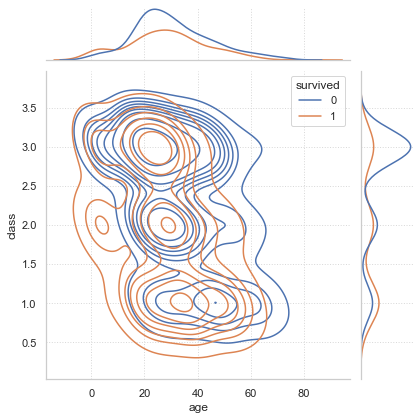

In [22]:
sns.jointplot(data=df, x='age', y='class', hue='survived', kind='kde')

Conditioning continuous rvs is similar, where instead of filling tables we slice the density plot. This will create a new density, which we can plot. For example, the plot for `age` given that `class = 1` is:

<AxesSubplot:title={'center':'P(age | class = 1)'}, xlabel='age', ylabel='Density'>

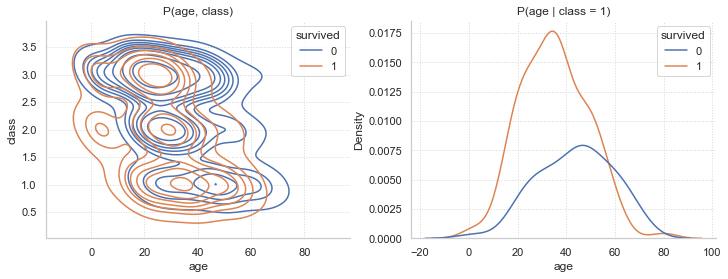

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].set_title('P(age, class)')
sns.kdeplot(data=df, x='age', y='class', hue='survived', ax=axs[0])

axs[1].set_title('P(age | class = 1)')
sns.kdeplot(data=df[df['class'] == 1], x='age', ax=axs[1], hue='survived')

We can already see that younger people that were in more pretigious classes (first and second class) had a higher chance of surviving than older people in upper classes.

## Independence and conditional independence

The rvs $X$ and $Y$ are **unconditionally independent** or marginally independent if we can represent the joint as the product of the two marginals. We denoted this as $X \,\bot\, Y$:

<center>
<div class="blue-box visible">
$$
\textbf{(unconditionally independence)} \qquad X \,\bot\, Y \Leftrightarrow f_{X,Y}(x, y) = f_X(x) f_Y(y)
$$
</div>
</center>

Or in general, a set of rvs is independent if the joint can be written as a product of marginals:

$$
f(X_1, ..., X_n) = \prod_{i=1}^n f_{X_i}(X_i)
$$

Most of the time our rvs are not unconditional independent because there we usually have interactions among them. However, this influence is usually mediated via other variables. We therefore say $X$ and $Y$ are **conditionally independent** (CI) given $Z$ iff the conditional joint can be written as a product of conditional marginals:

<center>
<div class="blue-box visible">
$$
\textbf{(conditionally independence)} \qquad X \,\bot\, Y \mid Z \Leftrightarrow f_{X,Y|Z}(x,y \mid z) = f_{X|Z}(x \mid z) f_{Y | Z}(y \mid z)
$$
</div>
</center>

Conditional independence is an assumption that arises naturally in **graphical models**, a tool used to define complex probabilistic relationships between random variables, such as correlation, dependence, and causality, concepts that are ubiquitous in all sciences.

> Note: Independence is hard to visualize and it is not common in general, unless we assume that. As we will see later, a simple way to understand independence is using the notion of _Mutual Information_, which dictates that two variables are independent if one does not increase the informativeness of the other. 

# Summary Statistics

Summary statistics are quantities that help us to summarize our data into a few numbers that characterize the data.


## Quantiles

If the cdf $F$ of a rv is strictly monotonically increasing, it has an inverse. This **inverse cdf** is called **quantile function**, denote das $F^{-1}$. The $q$'th quantile of $F$ is defined as:

<center>
<div class="blue-box visible">
$$
\textbf{($q$th quantile)} \qquad F^{−1}(q) = x_q \text{ such that } \Prob(X \leq x_q) = q
$$
</div>
</center>

- The value $F^{−1}(0.5)$ is the **median** of the distribution
- The value $F^{−1}(0.25)$ is the **lower quartile** of the distribution
- The value $F^{−1}(0.75)$ is the **upper quartile** of the distribution

The inverse CDF is useful in may ways, such as computing confidence intervals ("the famous 95% CI") and genertating "samples" from a distribution. 

The meaning is trivial for continuous rvs. For discrete rvs, it's only meaningful if the rv has some ordering. For example:

<AxesSubplot:xlabel='embark_town', ylabel='Proportion'>

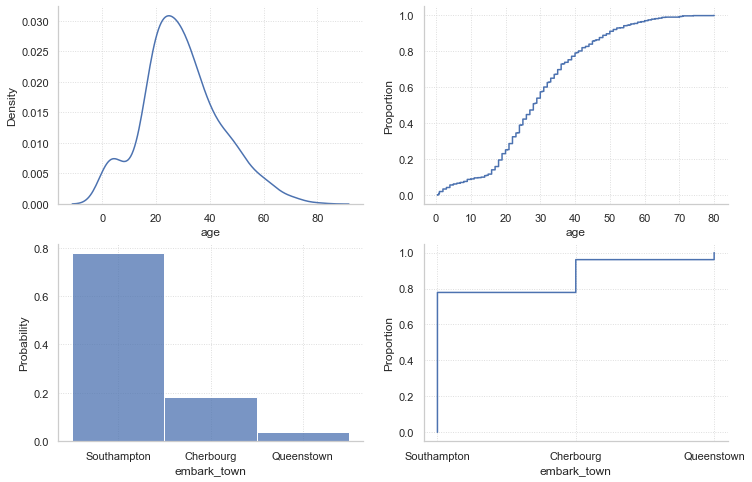

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

plot_pdf(df['age'], kind='sns', ax=axs[0,0])
plot_cdf(df['age'], kind='sns', ax=axs[0,1])
plot_pmf(df['embark_town'], kind='sns', ax=axs[1,0])
plot_cdf(df['embark_town'], kind='sns', ax=axs[1,1])

In [25]:
print(np.quantile(df['age'], q=0.2))  # 25% percentil
print(np.quantile(df['age'], q=0.5))  # median
print(np.quantile(df['age'], q=0.8))  # 75% percentil

19.0
28.0
41.0


In [26]:
towns = list(df['embark_town'].unique())
d = dict(zip(towns, range(len(towns))))
print(d)
print(np.quantile(df['embark_town'].map(d), q=0.2))  # 25% percentil
print(np.quantile(df['embark_town'].map(d), q=0.5))  # median
print(np.quantile(df['embark_town'].map(d), q=0.8))  # 75% percentil

{'Southampton': 0, 'Cherbourg': 1, 'Queenstown': 2}
0.0
0.0
1.0


## Expected value

The most familiar property of a distribution is its **mean**, or **expected value**, often denoted by $\mu$, defined as:

<center>
<div class="blue-box visible">
$$
\textbf{(expectation of a discrete rv)} \qquad \Expec[X] = \mu = \sum_{x \in \mathcal{X}} x f_X(x)
$$
</div>
<br>
<div class="blue-box visible">
$$
\textbf{(expectation of a continuous rv)} \qquad \Expec[X] = \mu = \int_{\mathcal{X}} x f_X(x) dx
$$
</div>
</center>

If this integral is not finite, the mean is not defined (we will see some examples of this later).

Expectations have some important properties, such as:

- Linearity of expectations:
$$
\Expec[aX + b] = a\Expec[X] + b
$$

- For a set of $n$ rvs (not necessarily independent):
$$
\Expec\left[\sum_{i=1}^n X_i \right] = \sum_{i=1}^n \Expec[X_i]
$$

- And if they are independent:
$$
\Expec\left[\prod_{i=1}^n X_i \right] = \prod_{i=1}^n \Expec[X_i]
$$

In code, the expected value is simply the mean of the distribution. Again, this is only meaningful for discrete rvs if they have some ordering.

In [27]:
print(np.mean(df['age']))
print('')

# linearity of expectations
print(np.mean(2*df['age'] + 1))
print(2 * np.mean(df['age']) + 1)
print('')

# expectation of sums = sum of expectations
print(np.mean(df['age'] + df['fare']))
print(np.mean(df['age']) + np.mean(df['fare']))

29.64209269662921

60.28418539325842
60.28418539325842

64.20934410112359
64.20934410112359


## Variance

The **variance** is a measure of the “spread” of a distribution, often denoted by $\sigma^2$, and defined as:

<center>
<div class="blue-box visible">
$$
\textbf{(variance of a rv)} \qquad \Var[X] = \sigma^2 = \Expec[(X - \mu)^2] = \Expec[X^2] - \mu^2
$$
</div>
</center>

From this we can extract the important result:

$$
\Expec[X^2] = \mu^2 - \sigma^2
$$

The **standard deviation** is defined as:

$$
\text{std}[X] = \sqrt{\Var[X]} = \sigma
$$

The variance has some important properties, such as:

- Scaling matters but not shifting:
$$
\Var[aX + b] = a^2\Var[X]
$$

- For a set of $n$ _independent_ rvs:
$$
\Var\left[\sum_{i=1}^n X_i \right] = \sum_{i=1}^n \Var[X_i]
$$

- And for their product:
$$
\Var\left[\prod_{i=1}^n X_i \right] = \prod_{i=1}^n (\sigma_i^2 + \mu_i^2) - \prod_{i=1}^n \mu_i^2
$$

In [28]:
print(np.var(df['age']))
print(np.mean(df['age'] ** 2) - np.mean(df['age'])**2)
print('')

# scaling matters
print(np.var(2*df['age'] + 1))
print(2**2 * np.var(df['age']))
print('')

# std
print(np.sqrt(np.var(df['age'])))
print(np.std(df['age']))

209.7500968846658
209.75009688466616

839.0003875386632
839.0003875386632

14.48275170278997
14.48275170278997


## Mode

The mode of a distribution is the value with the highest probability mass or probability density:


<center>
<div class="blue-box visible">
$$
\textbf{(mode of a rv)} \qquad x^\star = \arg\max_x f_X(x)
$$
</div>
</center>

If the distribution is multimodal, this may not be unique. 

For a discrete rv, the mode is simply the value that "repeats" the most. For a continuous rv, the meaning is similar but a little more intrinsicate since we have to compute the density (i.e., $28.0001 \neq 28.0002$). In code, we can do the following:

<AxesSubplot:xlabel='embark_town', ylabel='Probability'>

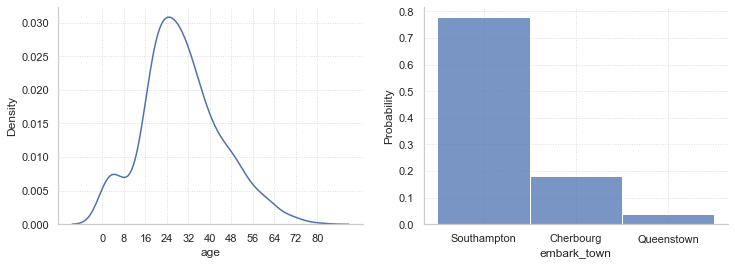

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

plot_pdf(df['age'], kind='sns', ax=axs[0], xticks=np.linspace(0, 80, 11))
plot_pmf(df['embark_town'], kind='sns', ax=axs[1])

In [30]:
# for a continuous rv, we need to estimate its density
pdf_age = gaussian_kde(df['age'])
# sample 1000 "ages" between min=0 and max=80ish
x = np.linspace(df['age'].min(), df['age'].max(), 1000)
y = pdf_age(x)
# find the age that maximizes the pdf
print(x[np.argmax(y)])
print('')

# for  a discrete rv, we just need to count:
print(df['embark_town'].value_counts())

24.716196196196197

Southampton    554
Cherbourg      130
Queenstown      28
Name: embark_town, dtype: int64


Overall, if we have a dataframe, we can get all os these statistics by calling the `.describe()` method: 

In [31]:
df.describe()

,survived,age,fare,class,relatives,adult
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,29.642093,34.567251,2.240169,0.946629,0.883427
std,0.491139,14.492933,52.938648,0.836854,1.485027,0.321136
min,0.000000,0.420000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,20.000000,8.050000,1.000000,0.000000,1.000000
50%,0.000000,28.000000,15.645850,2.000000,0.000000,1.000000
75%,1.000000,38.000000,33.000000,3.000000,1.000000,1.000000
max,1.000000,80.000000,512.329200,3.000000,7.000000,1.000000


## Limitations of summary statistics

Although it is common to summarize a probability distribution (or points sampled from a distribution) using simple statistics such as the mean and variance, this can lose a lot of information. Let's see a striking example using the Anscombe dataset.

In [32]:
df_anscombe = sns.load_dataset("anscombe")
df_anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


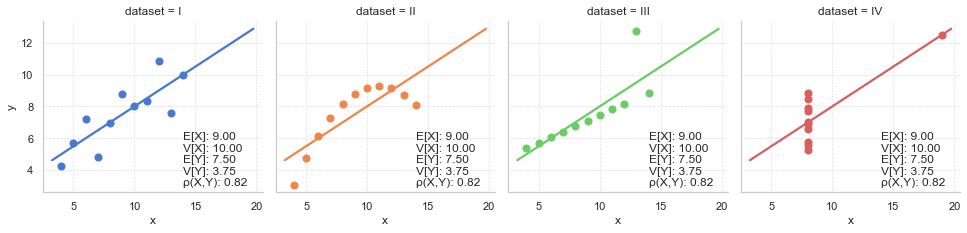

In [33]:
def annotate(data, **kws):
    ax = plt.gca()
    x = data['x'].to_numpy()
    y = data['y'].to_numpy()
    ax.annotate('E[X]: {:.2f}\n'.format(x.mean()) +
                'V[X]: {:.2f}\n'.format(x.var()) +
                'E[Y]: {:.2f}\n'.format(y.mean()) +
                'V[Y]: {:.2f}\n'.format(y.var()) +
                'ρ(X,Y): {:.2f}'.format(np.corrcoef(x, y)[0,1]),
                xy=(14, 3), fontsize=12)

g = sns.lmplot(
    data=df_anscombe,
    x="x", 
    y="y", 
    col="dataset", 
    hue="dataset", 
    col_wrap=4, 
    height=3.4, 
    ci=None, 
    truncate=False,
    palette="muted",
    scatter_kws={"s": 50, "alpha": 1}
)
g.set(xlim=(2.5, 20.5))
g.map_dataframe(annotate)

This shows 4 different datasets of (x, y) pairs, all of which have identical low order statistics: 

$$
\begin{align}
\Expec[X] &= 9 \\
\Var[X] &= 10 \\
\Expec[Y] &= 7.5 \\
\Var[Y] &= 3.75 \\
\rho(X, Y) &= 0.82 \quad \text{(Pearson correlation)}
\end{align}
$$

However, the joint distribution $f_{X,Y}(x,y)$ from which these points were sampled are clearly very different. This dataset shows how important is data visualization and how we can trust low order sufficient statistics blindly.

A more striking example is given below using the Datasaurus Dozen dataset ([created by Alberto Cairo](http://www.thefunctionalart.com/2016/08/download-datasaurus-never-trust-summary.html)):

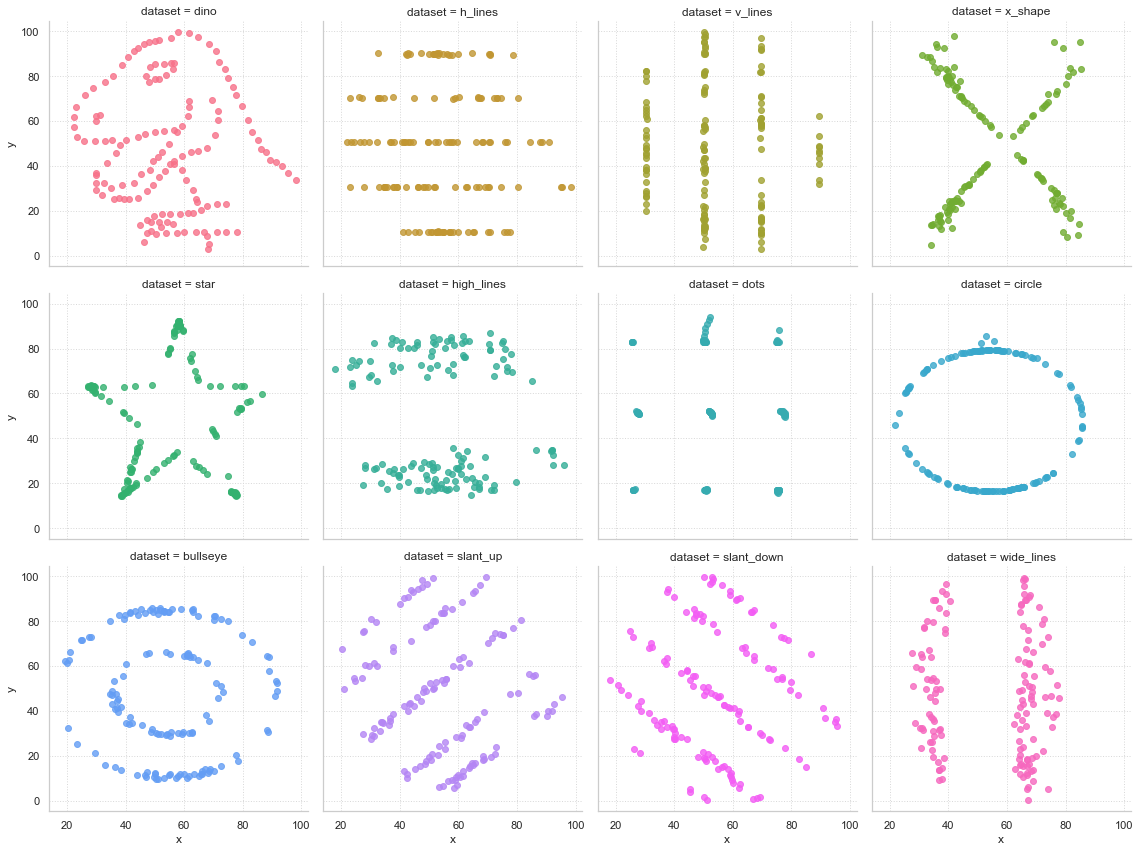

In [34]:
url = 'https://raw.githubusercontent.com/probml/probml-data/main/data/DatasaurusDozen.tsv'
df_dino = pd.read_csv(url, sep='\t' )
sns.lmplot(x="x", y="y", col="dataset", fit_reg=False, hue="dataset", data=df_dino,
           col_order = ['dino',  'h_lines', 'v_lines', 'x_shape',
                        'star', 'high_lines', 'dots', 'circle',
                        'bullseye', 'slant_up', 'slant_down', 'wide_lines'],
           col_wrap=4, ci=0, height=4)

1D plots can also suffer from this. For the example below, all datasets have the same median, and .25-.75 quartiles, as shown by the **box plots**. A better visualization in the right uses **violin plots**, which plots the density along the axis to better understand the distribution.

<img src="https://damassets.autodesk.net/content/dam/autodesk/research/publications-assets/gifs/same-stats-different-graphs/BoxViolinSmaller.gif" width="75%" />
<center>
    <small>Source: <a href="https://www.autodesk.com/research/publications/same-stats-different-graphs">Same Stats, Different Graphs</a> </small>
</center>

<AxesSubplot:xlabel='embark_town', ylabel='age'>

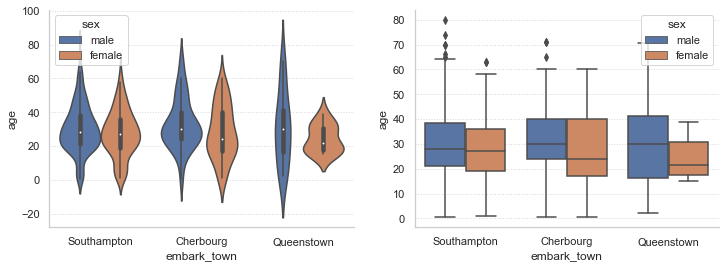

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
sns.violinplot(data=df, x="embark_town", y="age", hue="sex", ax=axs[0])
sns.boxplot(data=df, x="embark_town", y="age", hue="sex", ax=axs[1])

<center>
    <b>Exercises:</b>
    <br>
    (1) Plot all sub-datasets of the Anscombe dataset using matplotlib
    <br>
    (2) Additionally, use the Least Squares method from the previous lecture to plot a line fit
    <br>
    (3) Compute all learned statistics for each sub-dataset: quantile (0.05, 0.5, 0.95), expected value, variance, standard deviation, and mode
    <br>
    (4) Plot the pdf and the cdf for x and y, separatedly (tip: use <a href="https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot">sns.pairplot</a>)
    <br>
    (5) And also for their joint distribution
</center>

---

# Bayes' Rule

The Bayes' rule is ubiquitous in all of science. In fact, we already "saw it coming" when we derived the **product rule** of a conditional distribution (either discrete or continuous, so $p(\cdot) = f(\cdot)$):


$$
p_{X | Y}(x \mid y) = \dfrac{p_{X,Y}(x,y)}{p_Y(y)} \iff p_{X,Y}(x,y) = p_{X | Y}(x \mid y) p_Y(y)
$$

But instead of just naming variables $X$ and $Y$, we give them **proper meanings**. The Bayes’ rule is a formula for computing the probability distribution over possible values of an **unknown** (or **hidden**) quantity $H$ given some **known** (or **observed**) data $Y = y$:

<center>
<div class="blue-box visible">
$$
\textbf{(Bayes' rule)} \qquad p(H = h \mid Y = y) = \dfrac{p(Y=y \mid H=h) p(H=h)}{p(Y=y)}
$$
</div>
</center>

which follows immediatialy from the product rule: 
$$
p(h \mid y)p(y) = p(y \mid h)p(h) = p(h, y) 
$$

More precisely, the meaning of each term is:

- $p(H)$ represents the **prior distribution**, indicating what we know about the possible values of $H$ a priori, **before** we see any data.
- $p(Y \mid H = h)$ represents the **observation distribution**, indicating the possible outcomes $Y$ when we **observe** that $H = h$
- $p(Y = y\mid H = h)$ is the **likelihood** of evaluating the **observation distribution** at a point corresponding to the actual observation $Y = y$
- $p(Y)$ is called the **marginal distribution**, since it is computed by marginalizing over the unknown $H$:

$$
p(Y = y) = \sum_{h' \in \mathcal{H}} p(H=h', Y=y) = \sum_{h' \in \mathcal{H}} p(Y=y \mid H=h')p(H=h')
$$

- $p(H \mid Y = y)$ is the **posterior distribution**, which represents our new belief state about the possible values of $H$.

We can summarize Bayes rule in words as follows:
$$
\text{posterior} \propto \text{likelihood} \times \text{prior}
$$

where the symbol $\propto$ means "proportional to", since we just need to divide by the sum of whatever the numerator is in order to get a probability. Therefore, this value does not depend on $H$, so it is often ignored.

Using Bayes rule to update a distribution over unknown values of some quantity of interest, given relevant observed data, is called **Bayesian inference** or **probabilistic inference**, since we are infering the unknown quantity by fitting observations. Let's see an example in practice.

## Example: Testing for COVID-19

Suppose you think you may have contracted COVID-19, which is an infectious disease caused by the SARS-CoV-2 virus. You decide to take a diagnostic test, and you want to use its result to really determine if you are infected or not (you don't trust the test that much).

Let,
$$
\begin{align}
\text{you are infected:} &\quad H = 1   \\
\text{you are not infected:} &\quad H = 0  \\
\text{test is positive:} &\quad Y = 1  \\
\text{test is negative:} &\quad Y = 0  \\
\end{align}
$$

<!-- There are four combination between $H$ and $Y$:
$$
\begin{align}
\text{True Positive (TP):} &\quad H=1 \quad\text{and}\quad Y=1 \\
\text{False Negative (FN):} &\quad H=1 \quad\text{and}\quad Y=0 \\
\text{False Positive (FP):} &\quad H=0 \quad\text{and}\quad Y=1 \\
\text{True Negative (TN):} &\quad H=0 \quad\text{and}\quad Y=0
\end{align}
$$
 -->

We would like to compute $p(H = h \mid Y = y)$, or just $p(H \mid y)$ for brevity. We can think of this as a form of **binary classification**, where $H$ is the label and $y$ is the "input vector".

From the test itself, it is possible to know two measures:

$$
\text{sensitivity} = p(Y=1 \mid H=1) = \text{TP rate} \\
\text{specificity} = p(Y=0 \mid H=0) = \text{TN rate}
$$

- **Sensitivity** measures how good the test is at identifying people with the disease. 
- **Specificity** measures how good the test is at discarding people without the disease.

From these two quantities we can also compute the rate of FPs and FNs:

$$
\text{FN rate} = 1 - \text{sensitivity} \\
\text{FP rate} = 1 - \text{specificity}
$$

Now, we use Bayes' rule to get the desired quantity:
$$
\begin{align}
p(H=1 \mid Y=1) &= \dfrac{p(Y=1 \mid H=1) \times p(H=1)}{p(Y=1)} \\
 \ \\
 &= \dfrac{p(Y=1 \mid H=1) \times p(H=1)}{p(Y=1 \mid H=1) \times p(H=1) + p(Y=1 \mid H=0) \times p(H=0)} \\
 \ \\
 &= \dfrac{\text{TP rate} \times \text{prior}}{\text{TP rate} \times \text{prior} + \text{FP rate} \times (1 - \text{prior})}
\end{align}
$$


And in case the test was negative:
$$
\begin{align}
p(H=1 \mid Y=0) &= \dfrac{p(Y=0 \mid H=1) \times p(H=1)}{p(Y=0)} \\
\ \\
&= \dfrac{p(Y=0 \mid H=1) \times p(H=1)}{p(Y=0 \mid D=1) \times p(H=1) + p(Y=0 \mid H=0) \times p(H=0)} \\
 \ \\
 &= \dfrac{\text{FN rate} \times \text{prior}}{\text{FN rate} \times \text{prior} + \text{TN rate} \times (1 - \text{prior})}
\end{align}
$$

The **prior** $p(H = 1)$, represents the prevalence of the disease in the area. To be conservative, we will set this number to **10%**, which was the prevalence in New York City in Spring 2020 (https://nyti.ms/31MTZgV). In contrast, the estimated prevalence in Manaus during the 2021 crisis period was about **10-50%** (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8480276/). But let's stick with 10% for now.

Now, all we need is the values of sensitivity and specificity of the test, which we can get directly from the manufacturer:



| Test | Sensitivity | Specificity | Ref |
|---|---|---|---|
| IgM | 82% | 97% | [[link]](https://pebmed.com.br/testes-diagnosticos-para-covid-19-quais-as-evidencias-disponiveis/)
| IgG | 97% | 98% | [[link]](https://pebmed.com.br/testes-diagnosticos-para-covid-19-quais-as-evidencias-disponiveis/)
| Spit | 85% | 99% | [[link]](https://www.sanarmed.com/meta-analise-buscou-reunir-evidencias-sobre-acuracia-do-teste-de-saliva-para-diagnostico-da-covid-19)
| Spit | 96.5% | 99.9% | Flávia's

Now we can calculate the chance of having or not COVID-19:

In [36]:
def calc_prob_covid_pos(prior, sensitivity, specifity):
    tpr = sensitivity
    fpr = 1 - specifity
    return tpr * prior / (tpr * prior + fpr * (1 - prior))

print('Chance of having COVID-19 if test was positive: {:.2f}%'.format(
    100 * calc_prob_covid_pos(prior=0.1, sensitivity=0.85, specifity=0.9)
))

Chance of having COVID-19 if test was positive: 48.57%


In [37]:
def calc_prob_covid_neg(prior, sensitivity, specifity):
    tnr = specifity
    fnr = 1 - sensitivity
    return fnr * prior / (fnr * prior + tnr * (1 - prior))

print('Chance of having COVID-19 if test was negative: {:.2f}%'.format(
    100 * calc_prob_covid_neg(prior=0.1, sensitivity=0.85, specifity=0.99)
))

Chance of having COVID-19 if test was negative: 1.66%


<center>
    <b>Exercises:</b> <br>
    (1) Derive an expression and write a Python function for the general case 
    <br>
    (2) Compute the chance of not having covid ($H=0$) for when the test was negative ($Y=0$) and positive ($Y=1$)
    <br>
    (3) Test your expression for different values of the prior
</center>

## Example: inverse problems

Probability theory is concerned with predicting a distribution over outcomes $y$ given knowledge about the state of the world $h$. By contrast, **inverse probability** is concerned with inferring the state of the world from observations of outcomes. We can think of this as inverting the $h \to y$ mapping.

<img src="../figs/shadow_3d_polyhedra.png" width="20%" />
<center><small><a href="http://persci.mit.edu/pub_pdfs/polyhedra93.pdf">source</a></small></center>

For example, consider trying to infer a 3d shape $h$ from a 2d image $y$. Unfortunately, this is a fundamentally ill-posed problem since there are multiple possible hidden $h's$ consistent with the same observed $y$.

Similarly, **Machine Translation** is an ill-posed problem, since there are multiple possible translations $h$ from an input $y$:

$$
\begin{align}
\text{Source} &\text{:} \text{ A casa quase caiu.} \\
\text{Translation (1)} &\text{:} \text{ The house almost fell.} \\
\text{Translation (2)} &\text{:} \text{ The house almost collapsed.} \\
\text{Translation (3)} &\text{:} \text{ The house almost come down.} \\
\text{Translation (4)} &\text{:} \text{ The house nearly fell.} \\
\end{align}
$$

Bayes' inference gives us a way to compute the posterior $p(h|y)$. Hence, our prediction would be a hidden state $h$ that maximizes this posterior, which can be thought as the "most likely prediction under the given observations".

---

# Important Discrete Random Variables

## Bernoulli

The **pmf** of a Bernoulli distribution is defined as:
$$
X \in \{0, 1\} \\ \ \\ p_X(x) = \text{Ber}(x \mid \theta) = \begin{cases} \theta &\text{ if } x = 1 \\ 1 - \theta &\text{ if } x=0 \end{cases}
$$

For example, tossing a coin with probability of landing heads ($x = 1$) equal to $\theta$. We can write this compactily as:

$$
\text{Ber}(x \mid \theta) = \theta^x (1 - \theta)^{1 - x}
$$








<AxesSubplot:>

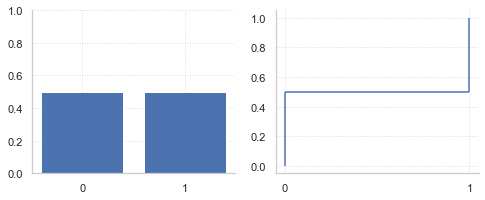

In [38]:
from scipy.stats import bernoulli

fig, axs = plt.subplots(1, 2, figsize=(8, 3))
rv = bernoulli(p=0.5)  # a fair coin
x = np.arange(0, 2)
plot_pmf_fn(x, rv.pmf, ax=axs[0], xticks=x, ylim=(0, 1))
plot_cdf_fn(x, rv.cdf, ax=axs[1], discrete=True, xticks=x)

## Binomial

The Bernoulli distribution is a special case of the binomial distribution, which has the following **pmf**:

$$
X \in \{0, 1, ..., n\} \\
\ \\
p_X(x) = \text{Bin}(x \mid n, \theta) = 
\left(\!
\begin{array}{c}
  n \\
  x
\end{array}
\!\right) \theta^x (1 - \theta)^{n-x}
$$

The Binomial can be thought of as the distribution of the number of heads in $n$ tossing coins (that is, a sum of $n$ Bernoulli rvs).

<AxesSubplot:>

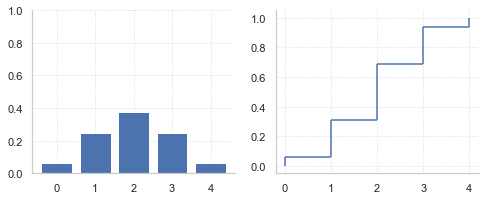

In [39]:
from scipy.stats import binom

fig, axs = plt.subplots(1, 2, figsize=(8, 3))
rv = binom(n=4, p=0.5)  # tossing 4 fair coins
x = np.arange(0, 5)
plot_pmf_fn(x, rv.pmf, ax=axs[0], xticks=x, ylim=(0, 1))
plot_cdf_fn(x, rv.cdf, ax=axs[1], discrete=True, xticks=x)

## Uniform

A uniform rv is has a distribution where all values have equal probability. Its **pmf** is:

$$
X \in \{a, ..., b\} \\ 
\ \\
p_X(x) = \text{Uni}(x \mid a, b) = \frac{1}{b-a+1}
$$


<AxesSubplot:>

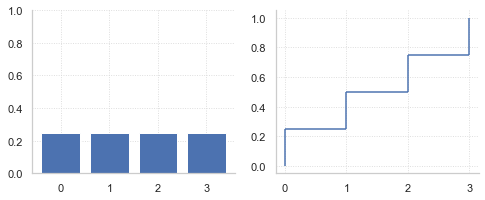

In [40]:
from scipy.stats import randint
fig, axs = plt.subplots(1, 2, figsize=(8, 3))

rv = randint(0, 4)
x = np.arange(0, 4)
plot_pmf_fn(x, rv.pmf, ax=axs[0], xticks=x, ylim=(0, 1))
plot_cdf_fn(x, rv.cdf, ax=axs[1], discrete=True, xticks=x)

## Categorical

To represent a distribution over a finite set of labels $x \in \{1, ..., C\}$, we can use the categorical distribution. Its **pmf** is:

$$
X \in \{1, ..., C\} \\ 
0 \leq \theta_c \leq 1, \sum_c \theta_c = 1 \\ 
\ \\
p_X(x) = \text{Cat}(x \mid \bm{\theta}) = \prod_{c=1}^C \theta_c^{[[x = c]]}
$$

where $[[x = c]]$ is $1$ if $x=c$, and $0$ otherwhise. In other words, 

$$
p(x = c \mid \bm{\theta}) = \theta_c
$$

Which can be seen as a generalization of the Bernoulli distribution to $C > 2$ possible values.


<AxesSubplot:>

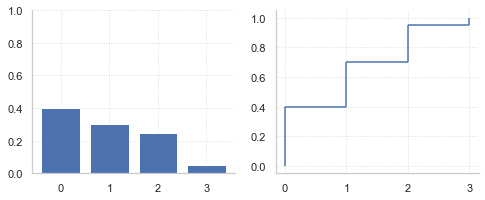

In [41]:
from scipy.stats import rv_discrete
fig, axs = plt.subplots(1, 2, figsize=(8, 3))

# suppose classes are [dog, cat, bird, fish]
theta = [0.4, 0.3, 0.25, 0.05]
rv = rv_discrete(values=(range(len(theta)), theta))
x = np.arange(0, 4)
plot_pmf_fn(x, rv.pmf, ax=axs[0], xticks=x, ylim=(0, 1))
plot_cdf_fn(x, rv.cdf, ax=axs[1], discrete=True, xticks=x)

## Multinomial

The binomial and categorical distributions are just a special case of the multinomial distribution, whose **pmf** is:


$$
X_i \in \{1, ..., C\} \text{ for } 1 \leq i \leq n \\ 
0 \leq \theta_c \leq 1, \quad \sum_{c=1}^C \theta_c = 1 \\ 
s_c = \sum_{i=1}^n [[x_i = c]], \quad \sum_{c=1}^C s_i = n \\
\ \\
p_X(x) = \text{Mu}(x \mid n, \bm{\theta}) = 
\left(\!
\begin{array}{c}
  n \\
  s_1 \cdots s_C
\end{array}
\!\right) \prod_{c=1}^C \theta_c^{s_c}
$$

_Relation to the binomial:_ Instead of tossing $n$ coins, the story of a multinomial is rolling a C-sided dice $n$ times and counting the number of times each faces shows up: $s_c$.

_Relation to the categorical:_ The sum of $n$ independent categorical distributions

In [42]:
from scipy.stats import multinomial

# suppose classes are [dog, cat, bird, fish]
theta = [0.4, 0.3, 0.25, 0.05]
rv = multinomial(n=3, p=theta)

# remember, x represents COUNTS of each class
print(rv.pmf(x=[1, 0, 1, 1]))
print(rv.pmf(x=[1, 0, 1, 2]))  # does not even sum to n=3, so p(x) = 0
print(rv.pmf(x=[1, 2, 0, 0]))
print(rv.pmf(x=[0, 3, 0, 0]))

# we could create a 3d plot for "trinomial" distribution where the number of classes C=3
# try that as an exercise!

0.030000000000000037
0.0
0.108
0.026999999999999972


---

# Creating a classifier

## Binary logistic regression

We can use a Bernoulli distribution to create a binary classifier, as follows:

$$
p(y \mid \bm{x}, \Theta) = \text{Ber}(y \mid f(\bm{x}; \Theta))
$$

Where $f(\bm{x}; \Theta)$ is some function that predicts the mean parameter of the Bernoulli distribution: $\theta$. For example, we could set $f$ to be a linear function of the form, with $\Theta = \{\bm{w}, b\}$:

$$
f(\bm{x}; \bm{w}, b) = \bm{w}^\top \bm{x} + b
$$

Moreover, since we need to satisfy the contraint $0 \leq f(\bm{x}; \bm{w}) \leq 1$, we can use the **sigmoid function** $\sigma(\cdot)$ to map all values of $f$ to the $[0, 1]$ interval:

$$
p(y \mid \bm{x}, \Theta) = \text{Ber}\big(y \mid \sigma(f(\bm{x}; \bm{w}, b))\big)
$$

The sigmoid function (also known as logistic function) is defined as:
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Text(0, 0.5, 'sigmoid(z)')

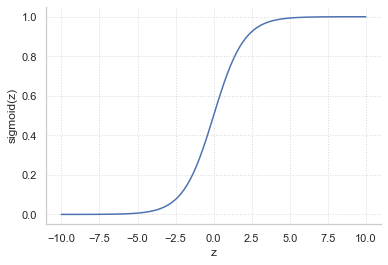

In [43]:
def sigmoid(z): 
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
plt.plot(z, sigmoid(z))
plt.xlabel('z')
plt.ylabel('sigmoid(z)')

A classifier of this type is called **binary logistic regression**, and has the following form:

$$
\begin{align}
p(y = 1 \mid \bm{x}; \bm{w}) &= \text{Ber}\big(y = 1 \mid \sigma(\bm{w}^\top \bm{x} + b) \big) \\
 &= \sigma(\bm{w}^\top \bm{x} + b) 
\end{align}
$$

Therefore, after we find good weights $\bm{w}$, our classifier can be seen as applying the logistic function to the dot product between $\bm{x}$ and $\bm{w}$ plus $b$.


## Multiclass logistic regression

Analougously, we can extended the binary classifier by using a categorical distribution instead of a Bernoulli for when $y \in \{1, ..., C\}$:

$$
p(y \mid \bm{x}, \Theta) = \text{Cat}(y \mid f(\bm{x}; \Theta))
$$

Which also equal to $\text{Mu}(\bm{y} \mid 1, f(\bm{x}; \Theta))$. 

As we saw, we need to ensure that $0 \leq f(\bm{x}; \Theta)_c \leq 1$ and $\sum_{c=1}^{C} f(\bm{x}; \Theta)_c = 1$. To do this, we pass the output of $f$ to a **softmax function**, also called the **multinomial logit**, defined as:

$$
\mathcal{S}(\bm{z}) = \left[\begin{array}{ccc}
\dfrac{e^{z_1}}{Z} & \cdots & \dfrac{e^{z_C}}{Z}
\end{array}\right]
$$

where $Z$ is just a constant to ensure that the whole thing sums up to 1:
$$
Z = \sum_{c=1}^C e^{z_c}
$$

Therefore, the softmax function maps a vector $\bm{z} \in \mathbb{R}^C$ to the simplex $\mathcal{S}(\bm{z}) \in \triangle^C$.

If we use a function of the form $f(\bm{x}; \Theta) = \bm{W}\bm{x} + \bm{b}$, then we arrive at a **multiclass logistic classifier**:

$$
p(y \mid \bm{x}, \Theta) = \text{Cat}(y \mid \mathcal{S}(\bm{W}\bm{x} + \bm{b}))
$$

Letting $\bm{z} = \bm{W}\bm{x} + \bm{b}$ be the C-dimensional vector of logits. Then we can rewrite the above as follows:

$$
p(y = c \mid \bm{x}, \Theta) = \dfrac{e^{z_c}}{\sum_{i=1}^C e^{z_{i}}}
$$

Therefore, after we find good weights $\bm{w}$, our classifier can be seen as applying the softmax function to the affine predictor function $\bm{W}\bm{x} + \bm{b}$.


### Example: binary classification

Let's try to predict if a passenger survived the Titanic accident given his/her `age`, `fare`, `class`, and `sex` information.

In [67]:
# get data for the desired columns
df_b = df[['age', 'fare', 'class', 'sex']]

# convert sex to 0 (male) and 1 (female)
df_b = df_b.replace({"sex": {'male': 0, 'female': 1}})  

# convert everything to float
df_b = df_b.astype(float)  

# convert dataframe to numpy array
X = df_b.to_numpy()
Y = df['survived'].to_numpy()

# set up weights (predetermined in this case)
# ideally, we would learn them from data
w = np.array([-3.69343163e-02,  5.22364048e-04, -1.26651896e+00, 2.50961131e+00])
b = 2.47091348

# get predictions
predictions = []
for i in range(X.shape[0]):
    # predictor function
    p = sigmoid(w @ X[i] + b)
    predictions.append(p)
    # which is equal to:
    # predictions.append(bernoulli.pmf(1, p=p))

# compute accuracy
Y_pred = np.array(predictions) > 0.5
print('Acc:', np.mean(Y == Y_pred))

Acc: 0.7921348314606742


So our simple "made up" classifier can get the right predictions 79% of the time!

---

# Important Continuous Random Variables

Let's see also three important and widely used continuous distributions.

## Uniform

Its **pdf** is given by:
$$
f_X(x) = \text{Uni}(x; a, b) = \begin{cases}\frac{1}{b-a} &\, \text{if } x \in [a, b] \\ 0, &\, \text{otherwise}\end{cases}
$$

<AxesSubplot:>

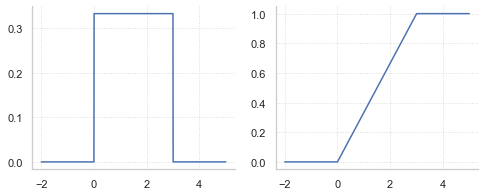

In [45]:
from scipy.stats import uniform
fig, axs = plt.subplots(1, 2, figsize=(8, 3))

rv = uniform(0, 3)
x = np.linspace(-2, 5, 1000)
plot_pdf_fn(x, rv.pdf, ax=axs[0])
plot_cdf_fn(x, rv.cdf, ax=axs[1])

## Exponential

Its **pdf** is given by:
$$
f_X(x) = \text{Exp}(x; \lambda) = \begin{cases}\lambda e^{-\lambda x} &\, \text{if } x \geq 0 \\ 0, &\, \text{otherwise}\end{cases}
$$


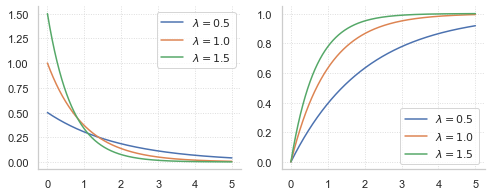

In [46]:
from scipy.stats import expon
fig, axs = plt.subplots(1, 2, figsize=(8, 3))

x = np.linspace(0, 5, 1000)
plot_pdf_fn(x, expon(scale=1/0.5).pdf, ax=axs[0], label="$\lambda = 0.5$")
plot_pdf_fn(x, expon(scale=1/1.0).pdf, ax=axs[0], label="$\lambda = 1.0$")
plot_pdf_fn(x, expon(scale=1/1.5).pdf, ax=axs[0], label="$\lambda = 1.5$")
axs[0].legend()

plot_cdf_fn(x, expon(scale=1/0.5).cdf, ax=axs[1], label="$\lambda = 0.5$")
plot_cdf_fn(x, expon(scale=1/1.0).cdf, ax=axs[1], label="$\lambda = 1.0$")
plot_cdf_fn(x, expon(scale=1/1.5).cdf, ax=axs[1], label="$\lambda = 1.5$")
axs[1].legend()

## Gaussian (normal)

The most widely used distribution of real-valued random variables $x \in \mathbb{R}$ is the **Gaussian distribution**, also called the **normal distribution**. It has two parameters:

- $\mu$, encoding the mean, also known as the "center of mass" or location of the density
- $\sigma^2$, encoding the variance, also known as the scaling factor

Its **pdf** is defined as:
$$
f_X(x) = \mathcal{N}(x; \mu, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{- \dfrac{(x - \mu)^2}{2\sigma^2}}
$$

where the term $\sqrt{2 \pi \sigma^2}$ is a normalization constant to ensure the density integrates to 1.

A gaussian with $\mu = 0$ and $\sigma^2 = 1$ is commonly called as **standard gaussian**.

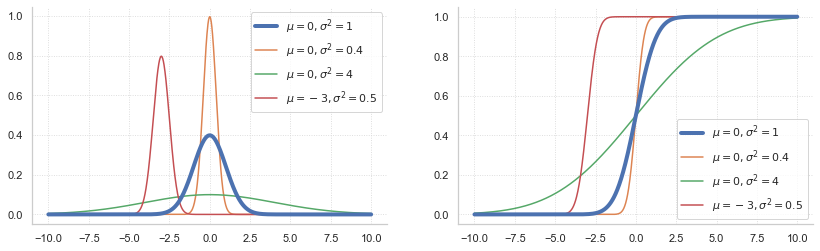

In [47]:
from scipy.stats import norm
fig, axs = plt.subplots(1, 2, figsize=(14, 4))

x = np.linspace(-10, 10, 1000)
plot_pdf_fn(x, norm(loc=0, scale=1).pdf,    ax=axs[0], label="$\mu = 0, \sigma^2 = 1$", lw=4, zorder=100)
plot_pdf_fn(x, norm(loc=0, scale=0.4).pdf,  ax=axs[0], label="$\mu = 0, \sigma^2 = 0.4$")
plot_pdf_fn(x, norm(loc=0, scale=4).pdf,    ax=axs[0], label="$\mu = 0, \sigma^2 = 4$")
plot_pdf_fn(x, norm(loc=-3, scale=0.5).pdf, ax=axs[0], label="$\mu = -3, \sigma^2 = 0.5$")
axs[0].legend()

plot_cdf_fn(x, norm(loc=0, scale=1).cdf,    ax=axs[1], label="$\mu = 0, \sigma^2 = 1$", lw=4, zorder=100)
plot_cdf_fn(x, norm(loc=0, scale=0.4).cdf,  ax=axs[1], label="$\mu = 0, \sigma^2 = 0.4$")
plot_cdf_fn(x, norm(loc=0, scale=4).cdf,    ax=axs[1], label="$\mu = 0, \sigma^2 = 4$")
plot_cdf_fn(x, norm(loc=-3, scale=0.5).cdf, ax=axs[1], label="$\mu = -3, \sigma^2 = 0.5$")
axs[1].legend()

There are many more useful distribution which are widely used in machine learning. Just to name a few.

- Geometric distribution (discrete)
- Poisson distribution (discrete)
- Laplace distribution (continuous)
- Student-t distribution (continuous)
- Beta distribution (continuous)
- Gamma distribution (continuous)

For more info on these distributions, consult Kevin Murphy's book.

---

# Joint distributions for multiple RVs

Let's see some ways in which we can measure the dependence of one or more variables on each other.


## Covariance

The covariance between two rv’s $X$ and $Y$ measures the degree in which they are linearly related. Covariance is defined as:

$$
\begin{align}
\text{Cov}[X, Y] &= \Expec\big[(X - \Expec[X]) (Y - \Expec[Y]) \big] \\
&= \Expec[XY] - \Expec[X]\Expec[Y]
\end{align}
$$


If $\bm{x}$ is a D-dimensional vector containing rvs, its covariance matrix is defined to be the following symmetric, positive semi-definite matrix:

$$
\begin{align}
\bm{\Sigma} = \text{Cov}[\bm{x}] &= \Expec\big[(\bm{x} - \Expec[\bm{x}]) (\bm{x} - \Expec[\bm{x}])^\top \big] \\
&= \left[\begin{array}{cccc} 
\Var[X_1] & \text{Cov}[X_1, X_2] & \cdots & \text{Cov}[X_1, X_D] \\
\text{Cov}[X_2, X_1] & \Var[X_2] & \cdots & \text{Cov}[X_2, X_D] \\
\vdots & \vdots & \ddots  & \vdots \\
\text{Cov}[X_D, X_1] & \text{Cov}[X_D, X_2] & \cdots & \Var[X_D]
\end{array}\right] \in \mathbb{R}_+^{D \times D}
\end{align}
$$

Joining both equations we get that:
$$
\bm{\Sigma} = \Expec[\bm{x}\bm{x}^\top] + \bm{\mu}\bm{\mu}^\top
$$

Scaling the covariance matrix by a linear transformation $\bm{A} \in \mathbb{R}^{D \times D}$ results in:

$$
\text{Cov}[\bm{A}\bm{x} + \bm{b}] = \bm{A}\text{Cov}[\bm{x}]\bm{A}^\top
$$

In code:

In [48]:
df.cov()

,survived,age,fare,class,relatives,adult
survived,0.241217,-0.586853,6.918651,-0.146510,0.032870,-0.021698
age,-0.586853,210.045104,71.462319,-4.437831,-6.471773,2.716770
fare,6.918651,71.462319,2802.500471,-24.494240,16.234227,0.207962
class,-0.146510,-4.437831,-24.494240,0.700325,0.067688,-0.045100
relatives,0.032870,-6.471773,16.234227,0.067688,2.205305,-0.239704
adult,-0.021698,2.716770,0.207962,-0.045100,-0.239704,0.103129


## Correlation

Covariances can be between negative and positive infinity. Sometimes it is more convenient to work with correlations, a normalized measure. The **(Pearson) correlation coefficient** between $X$ and $Y$ is defined as:

$$
\rho = \text{corr}[X, Y] = \text{corr}[Y, X] = \dfrac{\text{Cov}[X, Y]}{\sqrt{\Var[X] \Var[Y]}}, 
\quad \text{where } -1 \leq \rho \leq 1
$$

Moreover, $\text{corr}[X, Y] = 1$ if and only if $Y = aX + b$ with $a > 0$. That is, the correlation between $X$ and $Y$ is 1 only when there is a linear relationship between them. Clearly, the correlation of $X$ with itself is 1: $\text{corr}[X, X] = 1$.

However, the slope $a$ has nothing to do with the "strength" of the correlation. In fact, it is given by $a = \text{Cov}[X,Y] / \Var[X]$. A more striking example is given below:

<img src="https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg" width="60%" />
<center><small>Several sets of (x, y) points, with the correlation coefficient of x and y for each set.<br> Note that the correlation reflects the strength and direction of a linear relationship (top row), <br>but not the slope of that relationship (middle), nor many aspects of nonlinear relationships (bottom) <a href="https://en.wikipedia.org/wiki/Pearson_correlation_coefficient">[source]</a></small></center>

In code:

In [49]:
df.corr()

,survived,age,fare,class,relatives,adult
survived,1.000000,-0.082446,0.266100,-0.356462,0.045068,-0.137568
age,-0.082446,1.000000,0.093143,-0.365902,-0.300699,0.583723
fare,0.266100,0.093143,1.000000,-0.552893,0.206502,0.012233
class,-0.356462,-0.365902,-0.552893,1.000000,0.054467,-0.167817
relatives,0.045068,-0.300699,0.206502,0.054467,1.000000,-0.502634
adult,-0.137568,0.583723,0.012233,-0.167817,-0.502634,1.000000


As we saw, just looking at numbers might be misleading, so it is helpful to plot each pair of variables as a scatter plot in the $xy$-plane to better understand their relationship:

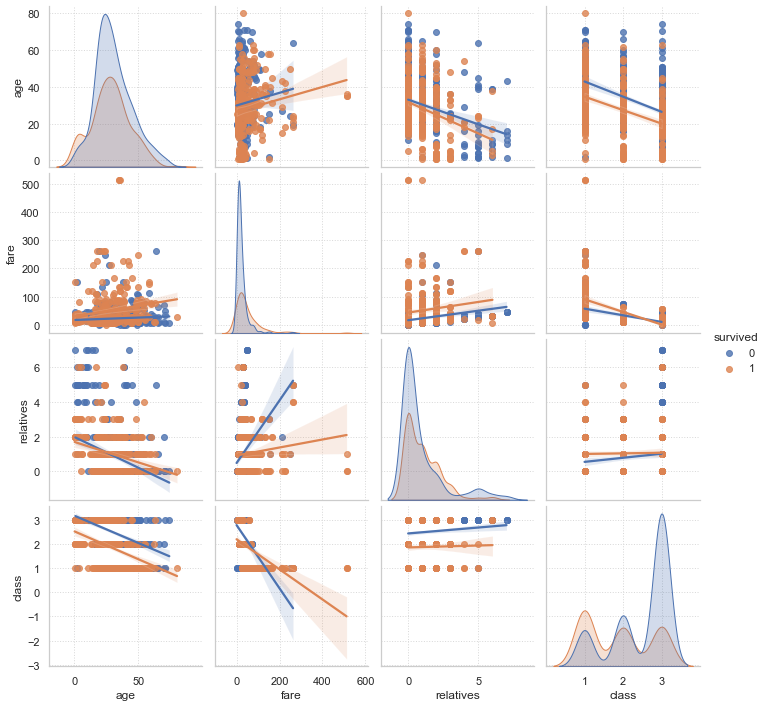

In [50]:
sns.pairplot(df, kind='reg', diag_kind='kde', vars=['age', 'fare', 'relatives', 'class'], hue='survived')

### Uncorrelated does not imply independent

Independence implies uncorrelation, but the opposite is not true:

$\newcommand{\notimplies}{\;\;\not\!\!\!\!\implies}$
$$
X \bot Y \implies \text{corr}(X, Y) = 0
\\ \ \\
\text{corr}(X, Y) = 0 \notimplies X \bot Y
$$

A more general measure of dependence between random variables is mutual information. This is zero only if the variables truly are independent.

### Correlation does not imply causation

It is well known that “correlation does not imply causation”. For example:

<img src="http://icbseverywhere.com/blog/wp-content/media/2014/10/Icecream.png" width="60%" />
<center><small>Examples of spurious correlation between causally unrelated time series. <br> Consumption of ice cream (red) and violent crime rate (yellow). over time <a href="http://icbseverywhere.com/blog/2014/10/the-logic-of-causal-conclusions/">[source]</a></small></center>

This is an example of a spurious correlation, due to a hidden common cause, namely the weather.

You can find more funny examples here: http://tylervigen.com/spurious-correlations



### Simpson’s paradox

Simpson’s paradox says that a statistical trend or relationship that appears in several different groups of data can disappear or reverse sign when these groups are combined. This results in counterintuitive behavior if we misinterpret claims of statistical dependence in a causal way. 

For example, consider a hypothetical case of patients (male and females) who are taking a drug D to cure their disease. Turns out, the drug can cause heart attack, so we keep a record of each case, as follow:

<table class="ex-table">
  <thead>
      <tr>
          <td><b>Sex/Treatment</b></td>
          <td colspan="3"><center><b>Control Group (No Drug)</b></center></td>
          <td colspan="3"><center><b>Treatment Group (With Drug)</b></center></td>
      </tr>
  </thead>
  <tbody >
      <tr>
        <td></td>
        <td><i>Heart attack</i></td>
        <td><i>No Heart attack</i></td>
        <td><i><b>Ratio</b></i></td>
        <td><i>Heart attack</i></td>
        <td><i>No Heart attack</i></td>
        <td><i><b>Ratio</b></i></td>
      </tr>
      <tr>
        <td><b>Female</b></td>
        <td><center>1</center></td>
        <td><center>19</center></td>
        <td><center><b>0.05</b></center></td>
        <td><center>3</center></td>
        <td><center>37</center></td>
        <td><center><b>0.08</b></center></td>
      </tr>
      <tr>
        <td><b>Male</b></td>
        <td><center>12</center></td>
        <td><center>28</center></td>
        <td><center><b>0.43</b></center></td>
        <td><center>8</center></td>
        <td><center>12</center></td>
        <td><center><b>0.66</b></center></td>
      </tr>
      <tr>
        <td><b>Total</b></td>
        <td><center>13</center></td>
        <td><center>47</center></td>
        <td><center><b>0.28</b></center></td>
        <td><center>11</center></td>
        <td><center>49</center></td>
        <td><center><b>0.22</b></center></td>
      </tr>
  </tbody>
</table>

How can this happen?

Here is another recent real example with COVID-19. This shows that the case fatality rate (CFR) of COVID-19 in Italy is less than in China in each age group, but is higher overall:

<img src="../figs/covid_italy_vs_china.png" width="80%" />

The reason for this is that there are more older people in Italy, as shown in the (b) subfigure.

The explanation for arriving at Simpson's paradoxes looks like this:

<img src="https://upload.wikimedia.org/wikipedia/commons/f/fb/Simpsons_paradox_-_animation.gif" width="40%" />
<center><small>Visualization of Simpson's paradox on data resembling real-world variability <br> indicates that risk of misjudgement of true relationship can be hard to spot</small></center>

---

# The multivariate Gaussian (normal) distribution

The most widely used joint probability distribution for continuous random variables is the **multivariate Gaussian** or **multivariate normal (MVN)**. This is mostly because it is mathematically convenient, but also because the Gaussian assumption is fairly reasonable in many cases.

The MVN density is defined by the following:

$$
\bm{mu} \text{ is a vector of means} \\
\bm{\Sigma} \text{ is a matrix of covariances} \\
\ \\
f_X(\bm{x}) = \mathcal{N}(\bm{x} \mid \bm{\mu}, \bm{\Sigma}) = \dfrac{1}{(2\pi)^{D/2} \text{det}(\bm{\Sigma})^{1/2}} \exp\left[ \dfrac{1}{2}(\bm{x} - \bm{\mu})^\top \bm{\Sigma}^{-1}(\bm{x} - \bm{\mu}) \right]
$$

Importantly: 
- Expected value: $\Expec[\bm{x}] = \bm{\mu}$ 
- Covariance: $\text{Cov}(\bm{x}) = \bm{\Sigma}$

One of the aspect for which a MVN is widely used is because the marginals and the conditionals of a MVN are also gaussians. 


Text(0, 0.5, 'Y axis')

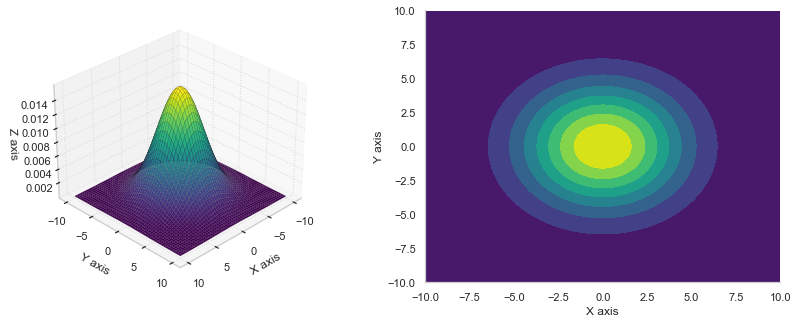

In [51]:
from scipy.stats import multivariate_normal

# define params (try playing with them)
mu_x = 0
var_x = 10
mu_y = 0
var_y = 10
cov_xy = 0
cov_yx = 0

# Create grid and multivariate normal
x = np.linspace(-10, 10, 1000)
y = np.linspace(-10, 10, 1000)
X, Y = np.meshgrid(x, y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y
rv = multivariate_normal([mu_x, mu_y], [[var_x, cov_xy], [cov_yx, var_y]])
Z = rv.pdf(pos)

# get fig
fig = plt.figure(figsize=(14, 5))
fig.tight_layout(pad=5)

# Make a 3D plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', linewidth=0.1, edgecolors='k')
ax.view_init(30, 45)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Make a 2D plot
ax = fig.add_subplot(1, 2, 2)
cset = ax.contourf(X, Y, Z, cmap='viridis')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')

<center><b>Exercise:</b> plot the marginals and the conditionals of a MVN</center>

---

# Information Theory

The last topic we will see is concerned with the **information content** of a rv. Note that this is just a quick recap, for more information check Kevin Murphy's book. 


## Entropy

The entropy of a probability distribution can be interpreted as a measure of uncertainty, or lack of "predictability".
More informally, a high entropy means that we have a lot of information (so we are very uncertain), whereas a low entropy means the opposite.

For example, suppose we observe a sequence of symbols $X_n \sim p$ generated from distribution $p$. If $p$ has high entropy, it will be hard to predict the value of each osbervation $X_n$. Hence we say that the dataset $\mathcal{D} = (X_1, ..., X_n)$ has high information content. By contrast, if $p$ is a degenerate distribution with $0$ entropy (the minimal value), then every $X_n$ will be the same, so $\mathcal{D}$ does not contain much information.

The entropy of a discrete random variable $X$ with distribution $p$ over $K$ states is defined by:

$$
\mathbb{H}(X) = - \sum_{k=0}^K p(X = k)\log p(X = k) = -\Expec[\log p(X)]
$$

In computer science we often use log base $2$, in which case the units are called **bits**. But is also common to use natural base $e$. Importantly, the entropy is bounded below and above by:

$$
\begin{align}
\text{(boundness)} &\quad 0 \leq \mathbb{H}(X) \leq \log K, \text{where} \\
\text{(minimizer)} &\quad \mathbb{H}(X) = 0 \Leftrightarrow p(X = k) = 1 \text{ for exactly one } k \in \{1, ..., K\}\\
\text{(maximizer)} &\quad \mathbb{H}(X) = \log K \Leftrightarrow p(X = k) = \text{Uni}(X; K)
\end{align}
$$

For example, for a Bernoulli rv parameterized by $\theta$:

$$
\begin{align}
\mathbb{H}(X) &= - \big[ p(X = 1)\log p(X = 1) + p(X = 0)\log p(X = 0)\big] \\
&= - \big[ \theta\log \theta + (1 - \theta)\log (1 - \theta)\big]
\end{align}
$$

Which is also known as a **binary entropy function**. Let's plot it

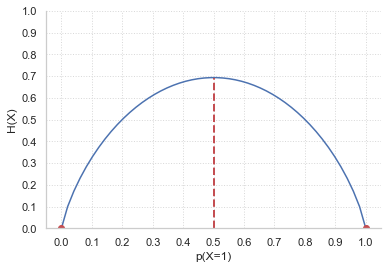

In [52]:
from scipy.stats import bernoulli

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

theta = np.linspace(0, 1, 50)
ax.plot(theta, bernoulli.entropy(theta))
ax.set_ylim(0, 1)
ax.set_yticks(np.linspace(0, 1, 11))
ax.set_xticks(np.linspace(0, 1, 11))
ax.set_xlabel('p(X=1)')
ax.set_ylabel('H(X)')
ax.vlines(0.5, 0, bernoulli.entropy(0.5), ls='--', lw=2, color='r')
ax.plot(0, 0, 'ro')
ax.plot(1, 0, 'ro')

In [53]:
from scipy.stats import entropy

print(df[['survived', 'sex', 'adult']].apply(lambda x : entropy(x.value_counts(), base=2)))
print('')
print(df[['class', 'embark_town']].apply(lambda x : entropy(x.value_counts(), base=3)))

survived    0.973519
sex         0.945763
adult       0.519429
dtype: float64

class          0.947060
embark_town    0.576162
dtype: float64


For continuous rvs, the entropy is called _differential entropy_, and its meaning is a little more subtle since the integral must exists and there are no positivity guarantees.

## Cross entropy

The cross entropy between distributions $p$ and $q$ is defined by:

$$
\mathbb{H}(p, q) = - \sum_{k=1}^K p(X=k) \log q(X=k)
$$

If $p$ and $q$ are bernoulli distributions, we arrive at the **binary cross entropy** formula. Similarly, if they are categorical, then we arrive at the **multiclass cross entropy** formula.



Text(0.5, 1.0, 'H(x,y) = 62.42')

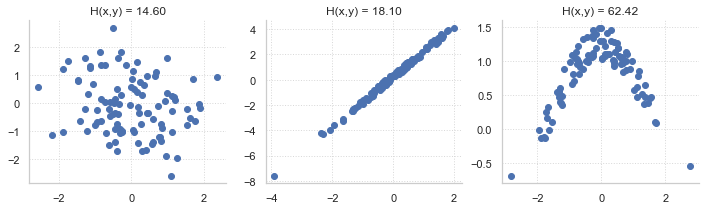

In [54]:
from scipy.stats.kde import gaussian_kde

def cross_entropy(x, y):
    z = np.linspace(-5, 5, 100)
    p = gaussian_kde(x)(z)
    q = gaussian_kde(y)(z)
    return -np.sum(np.where(q == 0, 0, p * np.log(q)))

fig, axs = plt.subplots(1, 3, figsize=(12, 3))

x = np.random.randn(100)
y = np.random.randn(100)
axs[0].plot(x, y, 'bo')
axs[0].set_title('H(x,y) = {:.2f}'.format(cross_entropy(x, y)))

x = np.random.randn(100)
y = 2 * x + np.random.rand(100) * 0.5
axs[1].plot(x, y, 'bo')
axs[1].set_title('H(x,y) = {:.2f}'.format(cross_entropy(x, y)))

x = np.random.randn(100)
y = np.cos(x) + np.random.rand(100) * 0.5
axs[2].plot(x, y, 'bo')
axs[2].set_title('H(x,y) = {:.2f}'.format(cross_entropy(x, y)))

## Perplexity 

The perplexity of a discrete probability distribution $p$ is defined as:

$$
\text{perplexity}(p) = 2^{\mathbb{H}(p)}
$$

This is often interpreted as a measure of predictability. 

For example, suppose we have an empirical distribution based on data: $p_{\mathcal{D}}(x \mid \mathcal{D})$. We can measure how well $p$ predicts the dataset by computing:

$$
\text{perplexity}(p_{\mathcal{D}} , p) = 2^{\mathbb{H}(p_{\mathcal{D}} ,p)}
$$

This idea is often used to evaluate the quality of statistical language models, which is a generative model for sequences of words.


## KL divergence

Given two distributions $p$ and $q$, it is often useful to define a distance metric to measure how "similar" they are. There are many possible divergence measures we can use, but we focus here on the **Kullback-Leibler divergence** or **KL divergence**.

For discrete distributions, the KL divergence is defined as follows:

$$
\mathbb{KL}(p \mid\mid q) = \sum_{k=1}^K p(X=k) \log \dfrac{p(X=k)}{q(X=k)} = \mathbb{H}(p, q) - \mathbb{H}(p)
$$

Which naturally extends to the continuous case:

$$
\mathbb{KL}(p \mid\mid q) = \int_{\mathcal{X}} p(x) \log \dfrac{p(x)}{q(x)} dx  = \mathbb{H}(p, q) - \mathbb{H}(p)
$$

where
$$
\begin{align}
\text{(positivity)} &\quad \mathbb{KL}(p \mid\mid q) \geq 0 \\
\text{(minimizer discrete)} &\quad \mathbb{KL}(p \mid\mid q) = 0 \Leftrightarrow p(X = k) = q(X = k), \text{ for all } k \in \{1, ..., K\}\\
\text{(minimizer continuous)} &\quad \mathbb{KL}(p \mid\mid q) = 0 \Leftrightarrow p(X = k) = q(X = k), \text{ almost everywhere}\\
\end{align}
$$

A zero KL means that the two distributions match perfectly. Whereas a higher KL means that the two distributions are very dissimilar.

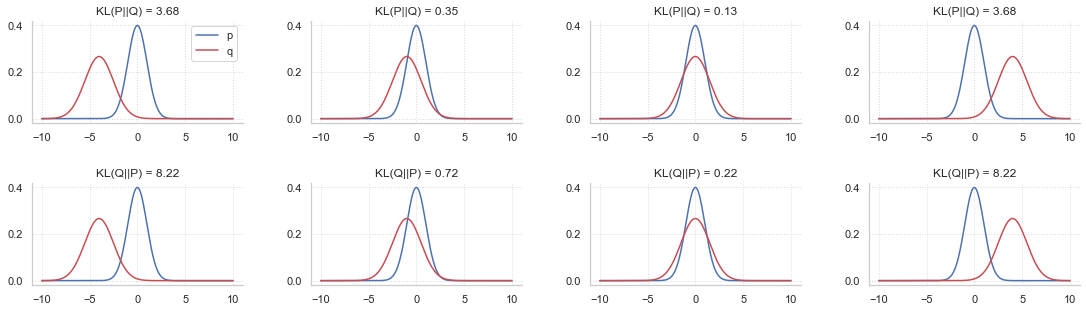

In [55]:
from scipy.stats import norm, entropy

fig, axs = plt.subplots(2, 4, figsize=(16, 5))
fig.tight_layout(pad=3)

x = np.linspace(-10, 10, 1000)
mus = [-4, -1, 0, 4]

for i, mu in enumerate(mus):
    p = norm.pdf(x, 0, 1)
    q = norm.pdf(x, mu, 1.5)
    kl = entropy(p, qk=q)
    axs[0,i].set_title('KL(P||Q) = {:.2f}'.format(kl))
    axs[0,i].plot(x, p, 'b-', label='p')
    axs[0,i].plot(x, q, 'r-', label='q')
    
    kl = entropy(q, qk=p)
    axs[1,i].set_title('KL(Q||P) = {:.2f}'.format(kl))
    axs[1,i].plot(x, p, 'b-')
    axs[1,i].plot(x, q, 'r-')
    
axs[0, 0].legend()

## Mutual Information

The KL divergence gave us a way to measure how similar two distributions were. How should we measure how dependant two random variables are? Remember that:

$$
X \,\bot\, Y \Leftrightarrow p(x, y) = p(x) p(y)
$$

One thing we could do is turn the question of measuring the dependence of two random variables into a question about the similarity of their distributions. This gives rise to the notion of **mutual information (MI)** between two random variables, defined as:

$$
\mathbb{I}(X; Y) = \mathbb{KL}(p(x,y) \mid\mid p(x)p(y))
$$

where
$$
\begin{align}
\text{(positivity)} &\quad \mathbb{I}(X; Y) \geq 0 \\
\text{(symmetry)} &\quad \mathbb{I}(X; Y) = \mathbb{I}(Y; X) \\
\text{(independence)} &\quad \mathbb{I}(X; Y) = 0 \Leftrightarrow X, Y \text{ are independent}.
\end{align}
$$

To gain some intuition, it is useful to know that:
$$
\begin{align}
\mathbb{I}(X; Y) &= \mathbb{H}(X) - \mathbb{H}(X \mid Y) \\
&= \mathbb{H}(Y) - \mathbb{H}(Y \mid X)
\end{align}
$$

Thus we can interpret the MI between $X$ and $Y$ as the reduction in uncertainty about $X$ after observing $Y$, or, by symmetry, the reduction in uncertainty about $Y$ after observing $X$. Since MI is always positive, this also shows that:

$$
\mathbb{H}(X \mid Y) \leq \mathbb{H}(X)
$$

We can also obtain different interpretations:
$$
\begin{align}
\mathbb{I}(X; Y) &= \mathbb{H}(X) + \mathbb{H}(Y) - \mathbb{H}(X,Y) \\
&= \mathbb{H}(X,Y) - \mathbb{H}(X \mid Y) - \mathbb{H}(Y \mid X)
\end{align}
$$

Therefore, MI is a measure of dependency between two random variables.

See the figure below for a summary of these equations in terms of an information diagram:

<img src="../figs/venn-entropies.png" width="60%" />
<center><small>Source: Kevin Murphy's book</small></center>

<br><br>
<center>
    <b>Exercise: </b> <br>
    Write a code to compute the MI between all columns of the Titanic dataset.
</center>